In [1]:
window_size="_768"
# " + window_size + "

In [2]:
import adclasses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import math
from datetime import timedelta
import os
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
dataset_name_list = ["ambient_temperature_system_failure",
                     "ec2_cpu_utilization_ac20cd",
                     "exchange-2_cpc_results",
                     "exchange-2_cpm_results",
                     "exchange-3_cpm_results",
                     "ibm-common-stock-closing-prices",
                     "rds_cpu_utilization_cc0c53",
                     "artificial_cd_1_random_removal",
                     "nyc_taxi_random_removal",
                     "artificial_cd_3_random_removal"]
true_outlier_indices_dict = {}
ad_dict = {}

# ambient_temperature_system_failure

In [4]:
dataset_name = "ambient_temperature_system_failure"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '1H', data))

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="1H", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2013-07-04 00:00:00
End date:  2014-05-28 15:00:00
Missing time stamps: 
 DatetimeIndex(['2013-07-28 02:00:00', '2013-07-28 05:00:00',
               '2013-07-28 06:00:00', '2013-07-28 07:00:00',
               '2013-07-28 08:00:00', '2013-07-28 09:00:00',
               '2013-07-28 10:00:00', '2013-07-28 11:00:00',
               '2013-07-28 12:00:00', '2013-07-28 13:00:00',
               ...
               '2014-04-10 05:00:00', '2014-04-10 06:00:00',
               '2014-04-10 07:00:00', '2014-04-10 08:00:00',
               '2014-04-10 09:00:00', '2014-04-10 10:00:00',
               '2014-04-10 11:00:00', '2014-04-10 12:00:00',
               '2014-04-10 13:00:00', '2014-04-10 14:00:00'],
              dtype='datetime64[ns]', length=621, freq=None)
Length:  7888
Time step size:  1H
Date Format:  %Y-%m-%d %H:%M:%S


# ec2_cpu_utilization_ac20cd

In [5]:
dataset_name = "ec2_cpu_utilization_ac20cd"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '5min', data))
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="5min", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-04-15 00:49:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-04-02 14:29:00
End date:  2014-04-16 14:49:00
Missing time stamps: 
 DatetimeIndex(['2014-04-07 13:39:00', '2014-04-07 13:44:00',
               '2014-04-14 23:49:00', '2014-04-14 23:54:00',
               '2014-04-14 23:59:00'],
              dtype='datetime64[ns]', freq=None)
Length:  4037
Time step size:  5min
Start Date:  2014-04-02 14:29:00
End Date:  2014-04-16 14:49:00
Date Format:  %Y-%m-%d %H:%M:%S


# exchange-2_cpc_results

In [6]:
dataset_name = "exchange-2_cpc_results"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '1H', data))

data =data.drop_duplicates(subset="timestamp")

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="1H", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2011-07-14 13:00:01"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2011-07-01 00:00:01
End date:  2011-09-07 15:00:01
Missing time stamps: 
 DatetimeIndex(['2011-07-21 05:00:01', '2011-08-08 18:00:01',
               '2011-08-10 16:00:01', '2011-08-15 22:00:01',
               '2011-08-15 23:00:01', '2011-09-01 19:00:01',
               '2011-09-01 20:00:01', '2011-09-01 21:00:01',
               '2011-09-01 22:00:01', '2011-09-01 23:00:01',
               '2011-09-02 00:00:01', '2011-09-02 01:00:01',
               '2011-09-02 02:00:01', '2011-09-02 03:00:01',
               '2011-09-02 04:00:01', '2011-09-02 05:00:01',
               '2011-09-02 06:00:01', '2011-09-02 07:00:01',
               '2011-09-02 08:00:01', '2011-09-02 09:00:01',
               '2011-09-02 10:00:01', '2011-09-02 11:00:01',
               '2011-09-02 12:00:01', '2011-09-02 13:00:01',
               '2011-09-02 14:00:01'],
              dtype='datetime64[ns]', freq=None)
Length:  1648
Time step size:  1H
Start Date:  2011-07-01 00:00:01
End Date:  2011-09-07 15:0

# exchange-2_cpm_results

In [7]:
dataset_name = "exchange-2_cpm_results"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
data = data.dropna()
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '1H', data))

data =data.drop_duplicates(subset="timestamp")

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="1H", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2011-07-01 00:00:01
End date:  2011-09-07 15:00:01
Missing time stamps: 
 DatetimeIndex(['2011-07-21 05:00:01', '2011-08-08 18:00:01',
               '2011-08-10 16:00:01', '2011-08-15 22:00:01',
               '2011-08-15 23:00:01', '2011-09-01 19:00:01',
               '2011-09-01 20:00:01', '2011-09-01 21:00:01',
               '2011-09-01 22:00:01', '2011-09-01 23:00:01',
               '2011-09-02 00:00:01', '2011-09-02 01:00:01',
               '2011-09-02 02:00:01', '2011-09-02 03:00:01',
               '2011-09-02 04:00:01', '2011-09-02 05:00:01',
               '2011-09-02 06:00:01', '2011-09-02 07:00:01',
               '2011-09-02 08:00:01', '2011-09-02 09:00:01',
               '2011-09-02 10:00:01', '2011-09-02 11:00:01',
               '2011-09-02 12:00:01', '2011-09-02 13:00:01',
               '2011-09-02 14:00:01'],
              dtype='datetime64[ns]', freq=None)
Length:  1648
Time step size:  1H
Start Date:  2011-07-01 00:00:01
End Date:  2011-09-07 15:0

# exchange-3_cpm_results

In [8]:
dataset_name = "exchange-3_cpm_results"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '1H', data))

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="1H", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2011-08-19 18:15:01"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2011-07-01 00:15:01
End date:  2011-09-07 14:15:01
Missing time stamps: 
 DatetimeIndex(['2011-07-07 03:15:01', '2011-07-07 04:15:01',
               '2011-07-08 03:15:01', '2011-07-08 04:15:01',
               '2011-07-08 05:15:01', '2011-07-08 07:15:01',
               '2011-07-08 08:15:01', '2011-07-08 11:15:01',
               '2011-07-08 12:15:01', '2011-07-08 13:15:01',
               ...
               '2011-09-01 14:15:01', '2011-09-01 15:15:01',
               '2011-09-01 16:15:01', '2011-09-01 17:15:01',
               '2011-09-04 18:15:01', '2011-09-04 20:15:01',
               '2011-09-05 14:15:01', '2011-09-05 16:15:01',
               '2011-09-06 00:15:01', '2011-09-06 13:15:01'],
              dtype='datetime64[ns]', length=109, freq=None)
Length:  1647
Time step size:  1H
Start Date:  2011-07-01 00:15:01
End Date:  2011-09-07 14:15:01
Date Format:  %Y-%m-%d %H:%M:%S


# ibm-common-stock-closing-prices

In [9]:
dataset_name = "ibm-common-stock-closing-prices"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path,header=0)
data["Date"] = pd.to_datetime(data["Date"],format="%Y-%m-%d")

data["timestamp"] = data["Date"]
del data["Date"]
data["value"] = data["IBM common stock closing prices"]
del data["IBM common stock closing prices"]

start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

missing = adclasses.find_missing_time_steps(start_date, end_date, '1D', data)
print("Missing time steps: ", missing)

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="1D", dateformat="%Y-%m-%d", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())

true_outlier_dates = ["1965-06-08 00:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  1962-01-02T00:00:00.000000000
End date:  1965-12-31T00:00:00.000000000
Missing time steps:  DatetimeIndex(['1962-01-06', '1962-01-07', '1962-01-13', '1962-01-14',
               '1962-01-20', '1962-01-21', '1962-01-27', '1962-01-28',
               '1962-02-03', '1962-02-04',
               ...
               '1965-11-28', '1965-12-04', '1965-12-05', '1965-12-11',
               '1965-12-12', '1965-12-18', '1965-12-19', '1965-12-24',
               '1965-12-25', '1965-12-26'],
              dtype='datetime64[ns]', length=452, freq=None)
Length:  1460
Time step size:  1D
Start Date:  1962-01-02T00:00:00.000000000
End Date:  1965-12-31T00:00:00.000000000
Date Format:  %Y-%m-%d


# rds_cpu_utilization_cc0c53

In [10]:
dataset_name = "rds_cpu_utilization_cc0c53"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '5min', data))

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="5min", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-02-25 07:15:00",
                      "2014-02-27 00:50:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-02-14 14:30:00
End date:  2014-02-28 14:30:00
Missing time stamps: 
 DatetimeIndex(['2014-02-25 07:10:00'], dtype='datetime64[ns]', freq='5T')
Length:  4033
Time step size:  5min
Date Format:  %Y-%m-%d %H:%M:%S


# artificial_cd_1_random_removal

In [11]:
dataset_name = "artificial_cd_1_random_removal"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '5min', data))

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="5min", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-04-01 00:00:00
End date:  2014-04-03 18:35:00
Missing time stamps: 
 DatetimeIndex(['2014-04-02 05:40:00', '2014-04-02 16:40:00',
               '2014-04-03 12:50:00', '2014-04-03 12:55:00'],
              dtype='datetime64[ns]', freq=None)
Length:  800
Time step size:  5min
Start Date:  2014-04-01 00:00:00
End Date:  2014-04-03 18:35:00
Date Format:  %Y-%m-%d %H:%M:%S


# nyc_taxi_random_removal

In [12]:
dataset_name = "nyc_taxi_random_removal"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '30min', data))

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="30min", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-07-01 00:00:00
End date:  2015-01-31 23:30:00
Missing time stamps: 
 DatetimeIndex(['2014-07-01 10:30:00', '2014-07-11 18:00:00',
               '2014-08-03 09:30:00', '2014-10-16 17:00:00',
               '2014-10-17 00:30:00', '2014-12-06 12:30:00',
               '2014-12-06 13:00:00', '2014-12-06 13:30:00',
               '2014-12-06 14:00:00'],
              dtype='datetime64[ns]', freq=None)
Length:  10320
Time step size:  30min
Date Format:  %Y-%m-%d %H:%M:%S


# artificial_cd_3_random_removal

In [13]:
dataset_name = "artificial_cd_3_random_removal"

path = "data/" + dataset_name + ".csv"

data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '5min', data))

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="5min", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00",
                      "2014-04-03 18:40:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)

true_outlier_indices_dict[dataset_name] = true_outlier_indices
ad_dict[dataset_name] = ad

Start date:  2014-04-01 00:00:00
End date:  2014-04-04 11:15:00
Missing time stamps: 
 DatetimeIndex(['2014-04-01 01:20:00', '2014-04-02 02:05:00',
               '2014-04-03 11:50:00'],
              dtype='datetime64[ns]', freq=None)
Length:  1000
Time step size:  5min
Start Date:  2014-04-01 00:00:00
End Date:  2014-04-04 11:15:00
Date Format:  %Y-%m-%d %H:%M:%S


In [14]:
weight_fp_list = []
for i in range(1,11):
    weight_fp_list.append(i/10)
print(weight_fp_list)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


# SARIMA Results

In [15]:
anomaly_scores_dict = {}

for dataset_name in dataset_name_list:
    output_dict_sarima = joblib.load("anomaly_scores" + window_size + "/SARIMA_auto/" + dataset_name)
    anomaly_scores_dict[dataset_name] = output_dict_sarima["Anomaly Scores"]

In [16]:
adclasses.precision_recall_curve_info(anomaly_scores_dict, true_outlier_indices_dict)

{0.1: {'precision': 0.0, 'recall': 0.0},
 0.2: {'precision': 0.0, 'recall': 0.0},
 0.3: {'precision': 0.0, 'recall': 0.0},
 0.4: {'precision': 0.0, 'recall': 0.0},
 0.5: {'precision': 0.0, 'recall': 0.0},
 0.6: {'precision': 0.0, 'recall': 0.0},
 0.7: {'precision': 0.0, 'recall': 0.0},
 0.8: {'precision': 0.0, 'recall': 0.0},
 0.9: {'precision': 0.0, 'recall': 0.0},
 1.0: {'precision': 0.0, 'recall': 0.0}}

---------weight_fp=0.1, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  17.7
Best window threshold:  0.5264
Corresponding window overall precision:  0.09826589595375723
Corresponding window overall recall:  0.7727272727272727
Corresponding window overall F score:  0.17435897435897438



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  16
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1183, 1184, 1185, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253

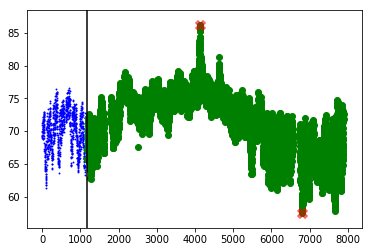




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 635, 637, 638, 639, 640, 641, 642, 643, 644, 645, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 665, 666, 667, 668, 669, 670, 671, 674, 675, 676, 677, 679, 680, 681, 682, 683, 684, 685, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 726, 727, 728, 729, 730, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 767,

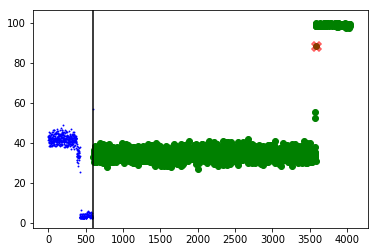




--- exchange-2_cpc_results ---
Corresponding window precision:  0.16666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  5
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [251, 275, 288, 299, 312, 968, 969, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1036, 1037, 1038, 1039, 1040, 1041, 1043, 1044, 1045, 1046, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 109

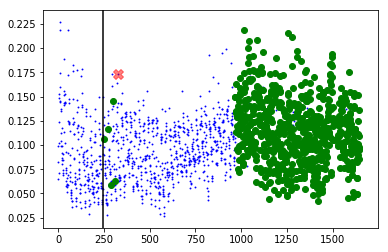




--- exchange-2_cpm_results ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  16
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 39

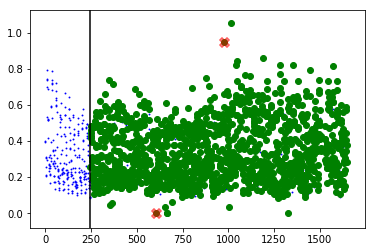




--- exchange-3_cpm_results ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 279, 280, 281, 282, 284, 285, 286, 287, 289, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 309, 310, 311, 312, 313, 315, 316, 317, 318, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 331, 332, 333, 334, 335, 337, 340, 341, 342, 344, 345, 346, 347, 348, 349, 350, 351, 353, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411

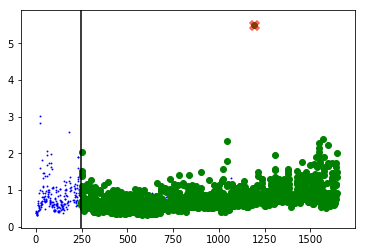




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [219, 220, 221, 222, 223, 224, 225, 227, 228, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 243, 246, 247, 248, 249, 251, 252, 253, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 280, 281, 282, 284, 285, 287, 288, 289, 290, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 310, 311, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 324, 325, 327, 328, 329, 330, 332, 333, 334, 335, 336, 337, 339, 340, 341, 342, 343, 344, 345, 347, 348, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 361, 363, 364, 365, 366, 371, 372, 374, 377, 378, 379, 380, 381, 382, 383, 385, 386, 389, 392, 393, 394, 395, 396, 399, 401, 402, 403, 404, 405, 407, 408, 409, 410,

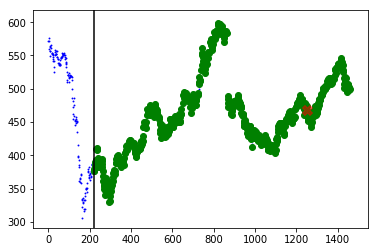




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  16
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 623, 624, 625, 627, 628, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 740, 741, 742, 743, 744, 745, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756

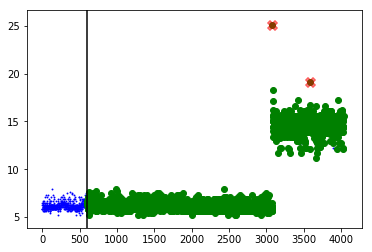




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.1
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  9
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [120, 121, 122, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 

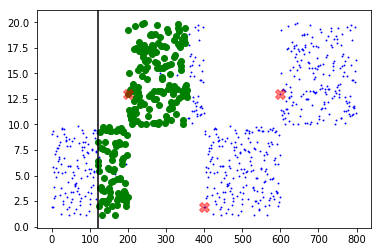




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.1388888888888889
Corresponding window recall:  1.0
Corresponding window false positives:  31
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1548, 1549, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1592, 1593, 1595, 1597, 1598, 1599, 1600, 1601, 1602, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1637, 1638, 1639, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1664, 1665, 1666, 1667, 2468, 2469, 2470, 2471, 2472, 2473, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482

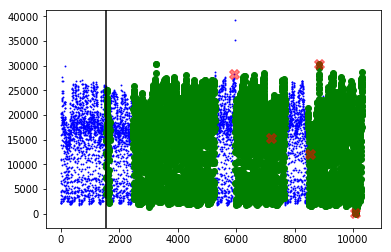




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


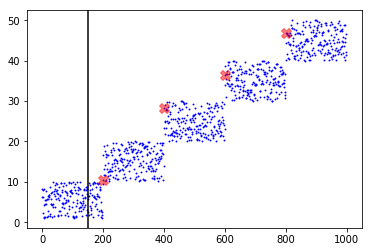

---------weight_fp=0.2, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.0
Best window threshold:  1.0
Corresponding window overall precision:  0.2857142857142857
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.2222222222222222



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


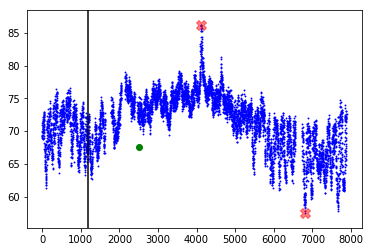




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


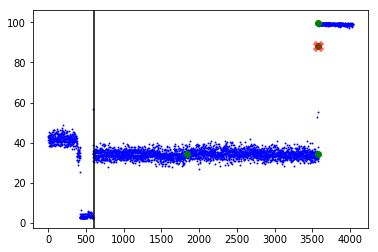




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1536, 1560]


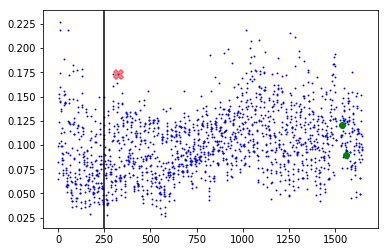




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


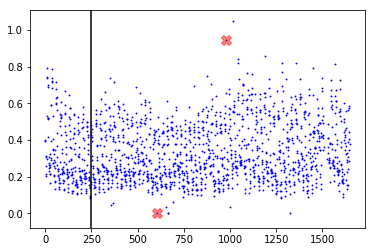




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


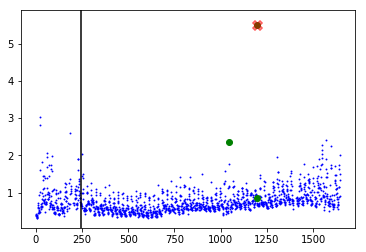




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364]


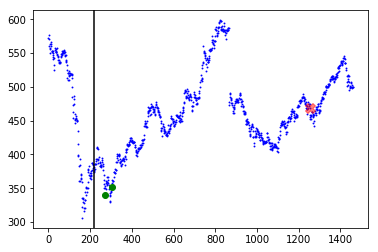




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


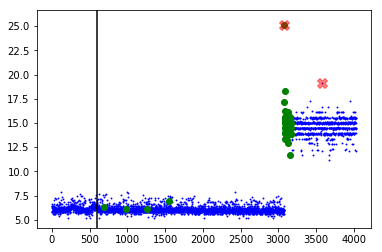




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


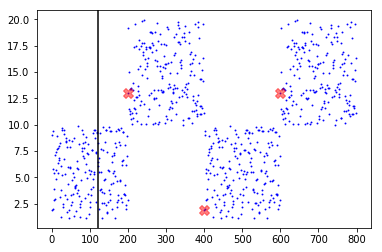




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.2
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [8832, 8833]


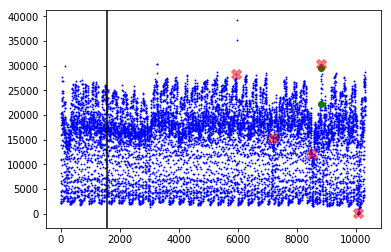




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


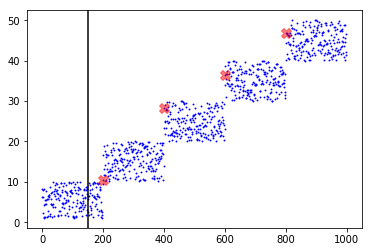

---------weight_fp=0.3, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  21.0
Best window threshold:  1.0
Corresponding window overall precision:  0.2857142857142857
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.2222222222222222



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


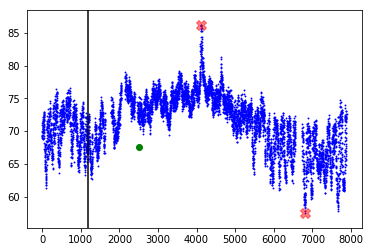




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


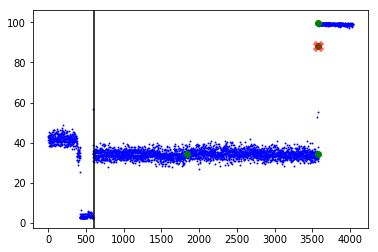




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1536, 1560]


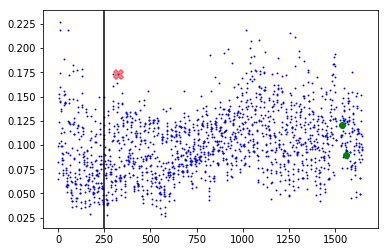




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


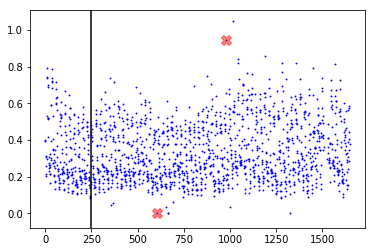




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


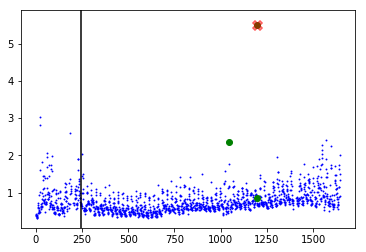




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364]


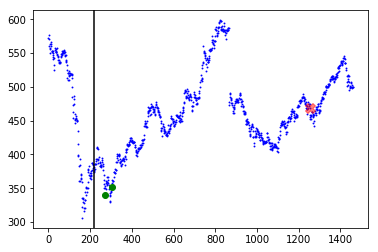




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


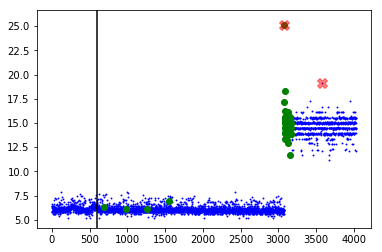




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


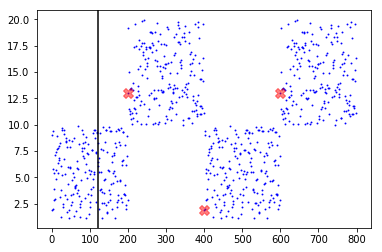




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.2
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [8832, 8833]


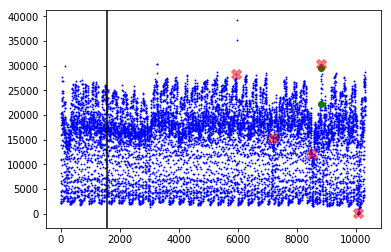




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


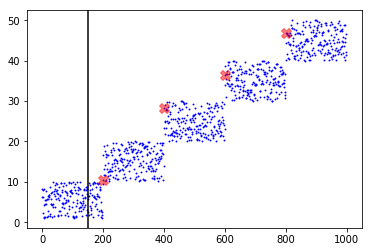

---------weight_fp=0.4, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  22.0
Best window threshold:  1.0
Corresponding window overall precision:  0.2857142857142857
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.2222222222222222



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


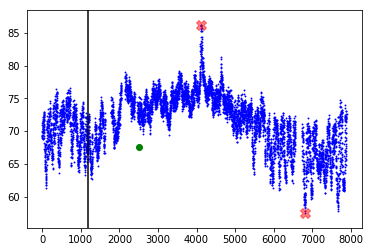




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


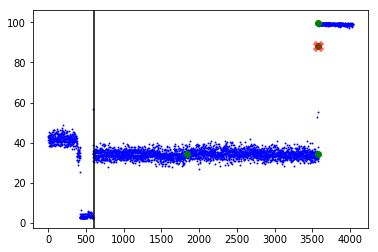




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1536, 1560]


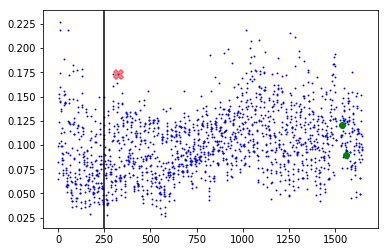




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


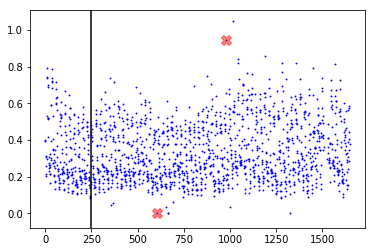




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


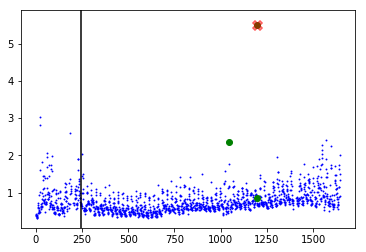




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364]


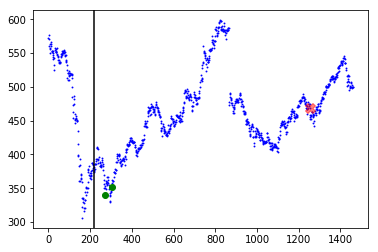




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


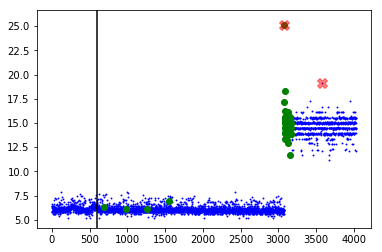




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


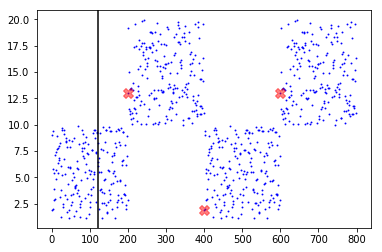




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.2
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [8832, 8833]


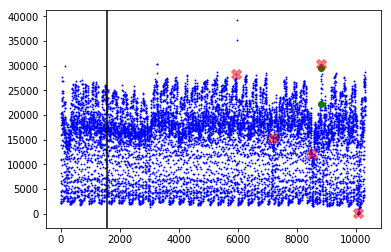




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


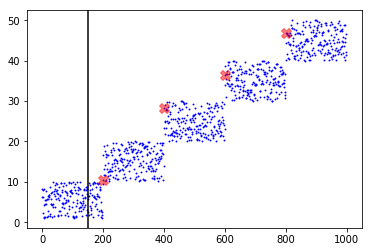

---------weight_fp=0.5, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  23.0
Best window threshold:  1.0
Corresponding window overall precision:  0.2857142857142857
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.2222222222222222



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


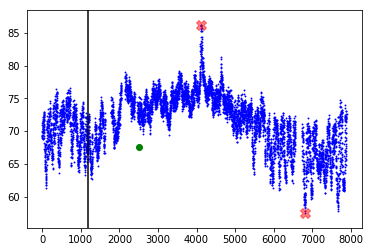




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


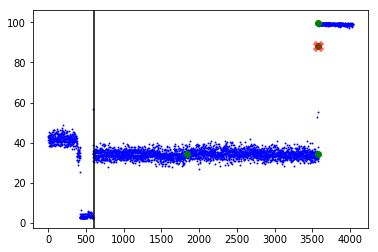




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1536, 1560]


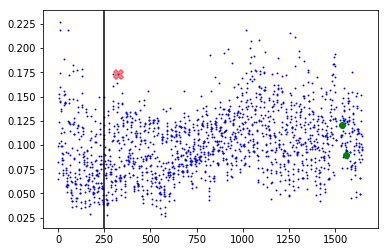




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


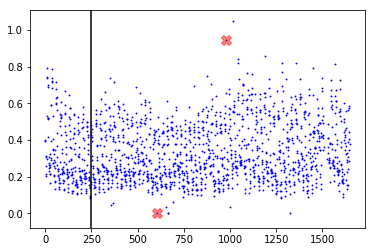




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


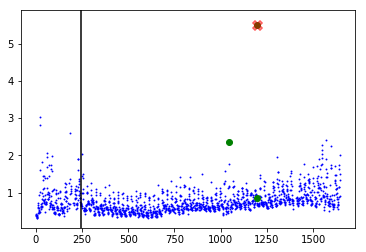




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364]


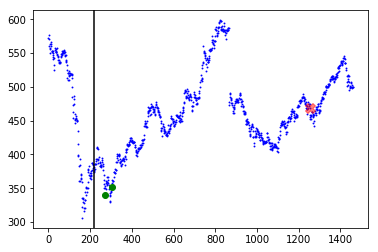




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


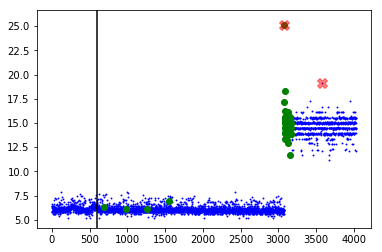




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


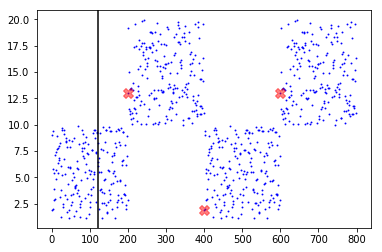




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.2
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [8832, 8833]


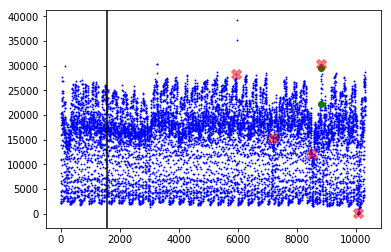




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


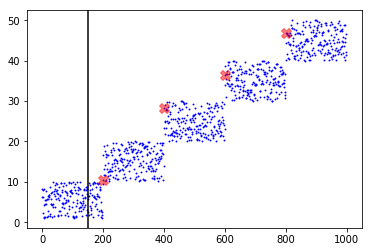

---------weight_fp=0.6, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  24.0
Best window threshold:  1.0
Corresponding window overall precision:  0.2857142857142857
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.2222222222222222



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


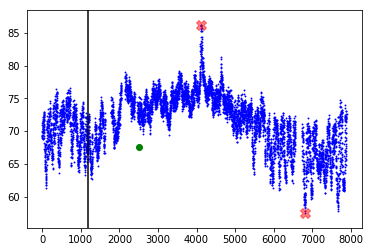




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


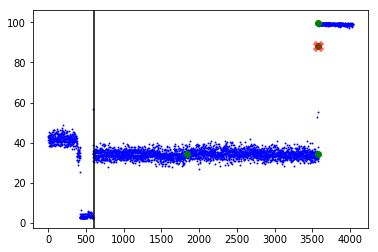




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1536, 1560]


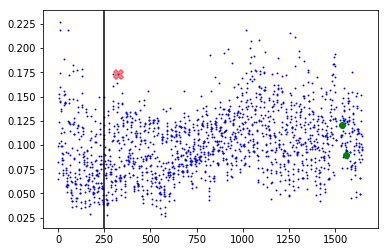




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


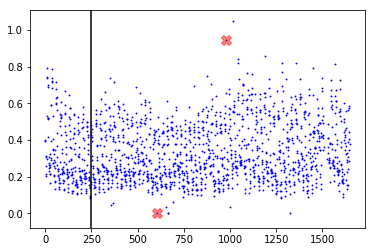




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


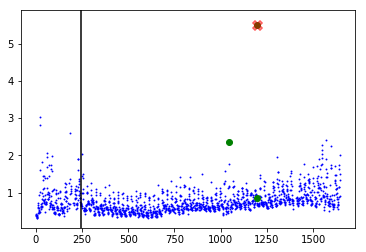




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364]


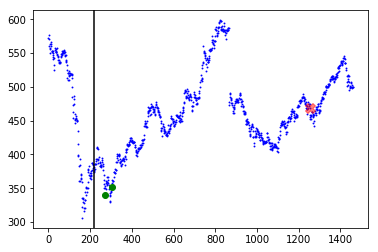




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


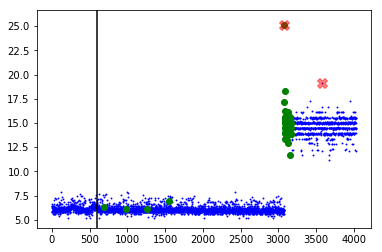




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


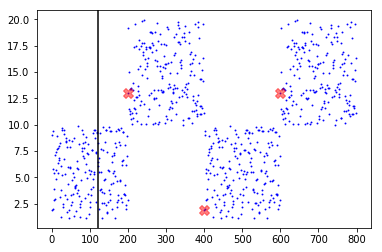




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.2
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [8832, 8833]


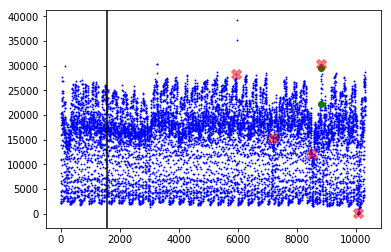




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


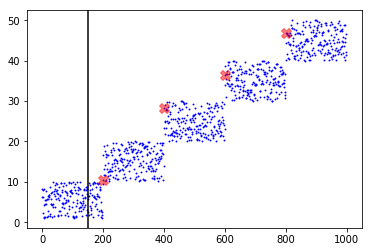

---------weight_fp=0.7, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  25.0
Best window threshold:  1.0
Corresponding window overall precision:  0.2857142857142857
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.2222222222222222



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


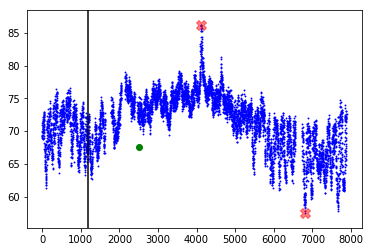




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


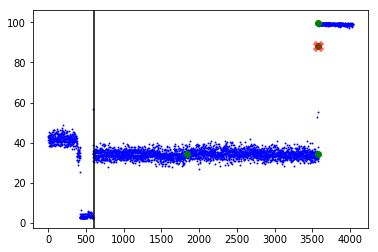




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1536, 1560]


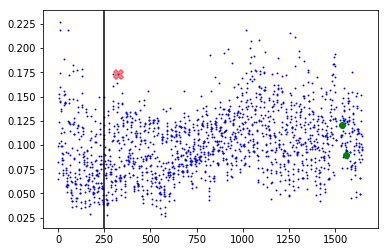




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


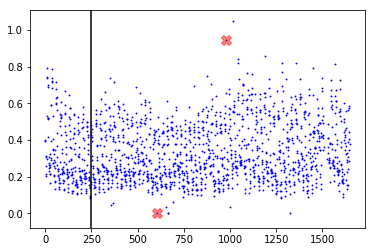




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


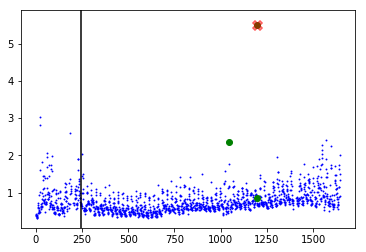




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364]


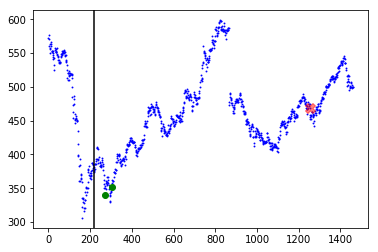




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


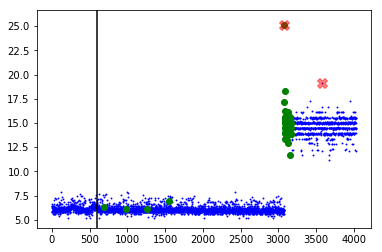




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


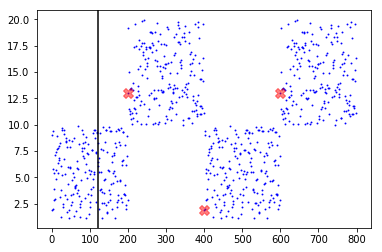




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.2
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [8832, 8833]


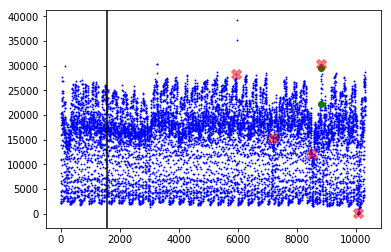




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


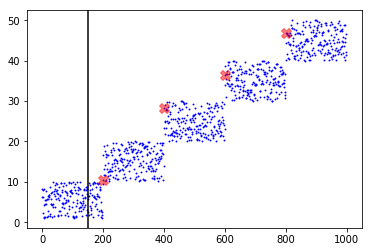

---------weight_fp=0.8, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  26.0
Best window threshold:  1.0
Corresponding window overall precision:  0.2857142857142857
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.2222222222222222



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


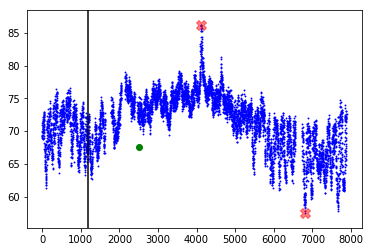




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


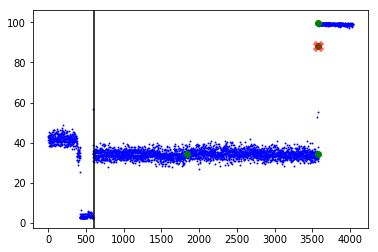




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1536, 1560]


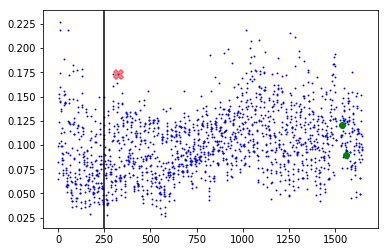




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


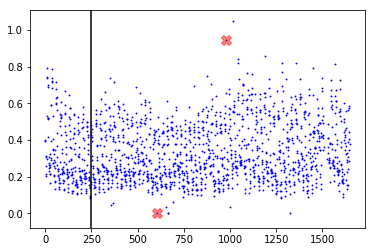




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


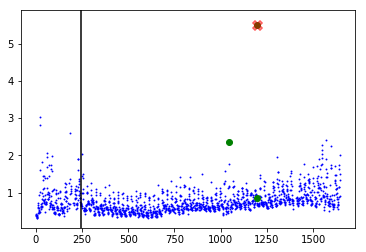




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364]


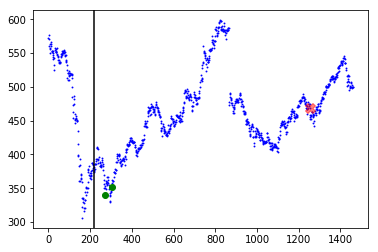




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


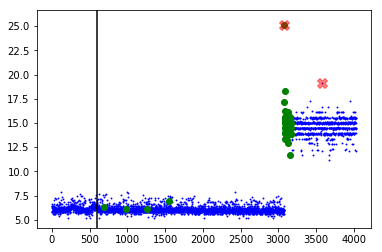




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


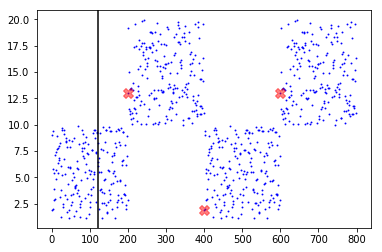




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.2
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [8832, 8833]


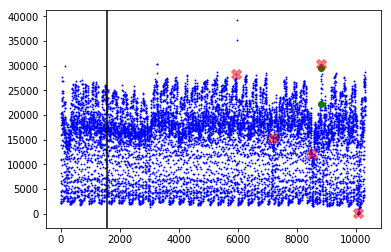




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


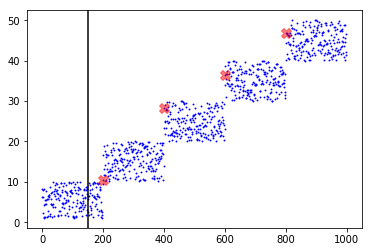

---------weight_fp=0.9, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  27.0
Best window threshold:  1.0
Corresponding window overall precision:  0.2857142857142857
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.2222222222222222



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


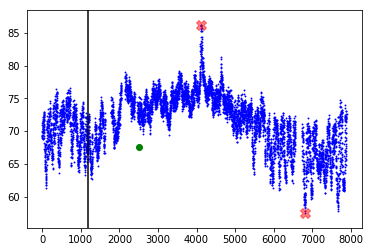




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


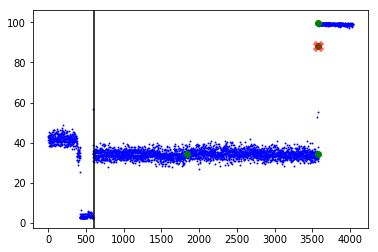




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1536, 1560]


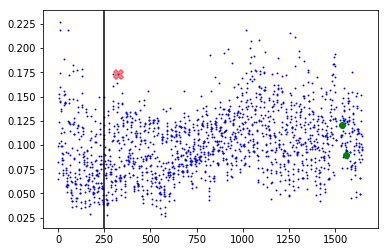




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


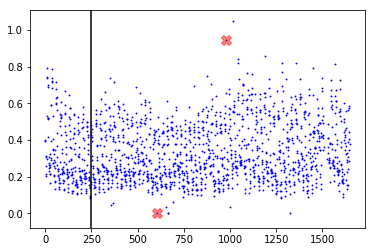




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


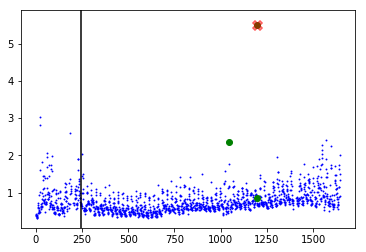




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364]


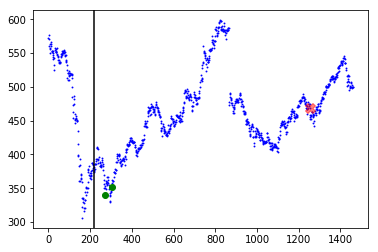




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


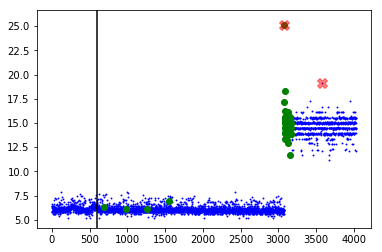




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


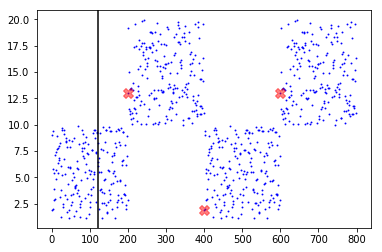




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.2
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [8832, 8833]


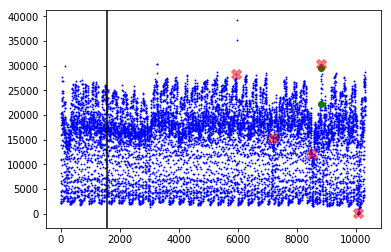




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


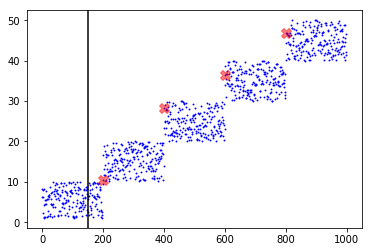

---------weight_fp=1.0, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  28.0
Best window threshold:  1.0
Corresponding window overall precision:  0.2857142857142857
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.2222222222222222



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [2518]


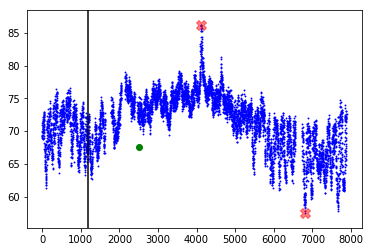




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1843, 3572, 3580, 3581]


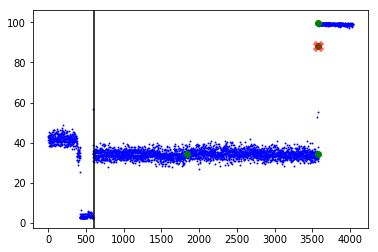




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1536, 1560]


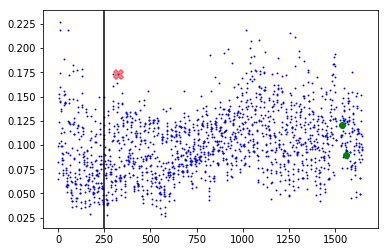




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


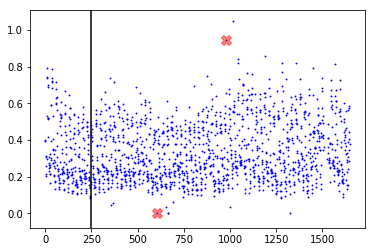




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194, 1195]


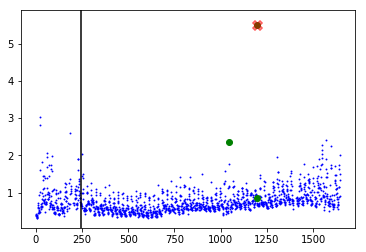




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [242, 272, 303, 364]


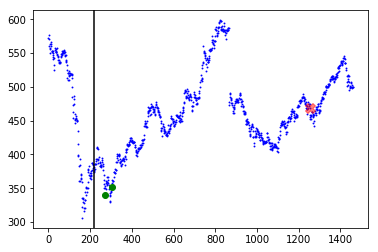




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.2
Corresponding window recall:  0.5
Corresponding window false positives:  4
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [690, 978, 1266, 1554, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


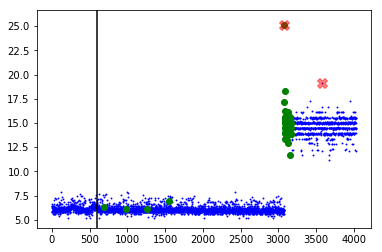




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


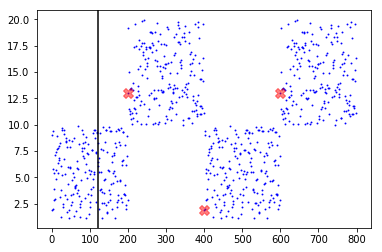




--- nyc_taxi_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.2
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [8832, 8833]


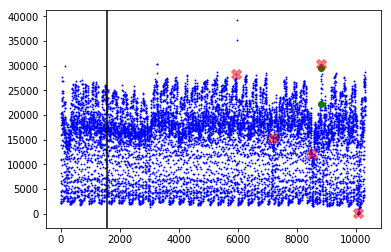




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


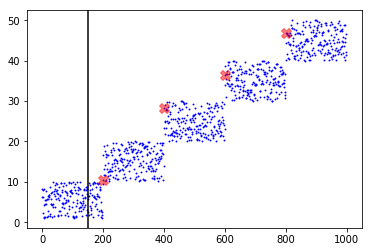

------------
False Positive Weight:  0.1
	 Minimum number of mistakes : 17.7
	 Best window threshold : 0.5264
	 Corresponding window overall precision : 0.09826589595375723
	 Corresponding window overall recall : 0.7727272727272727
	 Corresponding window overall F score : 0.17435897435897438
False Positive Weight:  0.2
	 Minimum number of mistakes : 20.0
	 Best window threshold : 1.0
	 Corresponding window overall precision : 0.2857142857142857
	 Corresponding window overall recall : 0.18181818181818182
	 Corresponding window overall F score : 0.2222222222222222
False Positive Weight:  0.3
	 Minimum number of mistakes : 21.0
	 Best window threshold : 1.0
	 Corresponding window overall precision : 0.2857142857142857
	 Corresponding window overall recall : 0.18181818181818182
	 Corresponding window overall F score : 0.2222222222222222
False Positive Weight:  0.4
	 Minimum number of mistakes : 22.0
	 Best window threshold : 1.0
	 Corresponding window overall precision : 0.2857142857142857

In [17]:
end_results = {}
for weight_fp in weight_fp_list:  
    print("---------weight_fp=" + str(weight_fp) + ", weight_fn=1----------")
    weight_result = adclasses.pretty_print_results(ad_dict, anomaly_scores_dict, true_outlier_indices_dict, weight_fp=weight_fp, weight_fn=1)
    end_results[weight_fp] = weight_result

print("------------")
adclasses.pretty_print_end_results(end_results)

# Prophet Results

In [19]:
anomaly_scores_dict = {}

for dataset_name in dataset_name_list:
    output_dict_prophet = joblib.load("anomaly_scores" + window_size + "/Prophet/" + dataset_name)
    anomaly_scores_dict[dataset_name] = output_dict_prophet["Anomaly Scores"]

In [20]:
adclasses.precision_recall_curve_info(anomaly_scores_dict, true_outlier_indices_dict)

{0.1: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.2: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.3: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.4: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.5: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.6: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.7: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.8: {'precision': 0.11764705882352941, 'recall': 1.0},
 0.9: {'precision': 0.11764705882352941, 'recall': 1.0},
 1.0: {'precision': 0.0, 'recall': 0.0}}

---------weight_fp=0.1, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  11.299999999999999
Best window threshold:  0.9999
Corresponding window overall precision:  0.37142857142857144
Corresponding window overall recall:  0.5909090909090909
Corresponding window overall F score:  0.456140350877193



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  1.0
Corresponding window false positives:  5
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1588, 1590, 1591, 1639, 1640, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4117, 4118, 4119, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 5899, 5900, 5901, 5902, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5942, 5943, 6631,

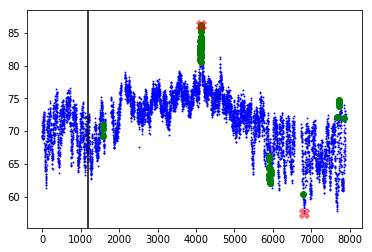




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [640, 645, 646, 647, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 693, 694, 695, 697, 700, 901, 904, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967]


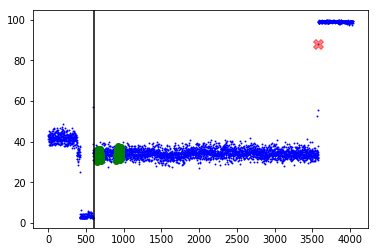




--- exchange-2_cpc_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [317, 325, 439, 489, 534, 535, 558, 559, 585, 607, 633, 655, 1234, 1306]


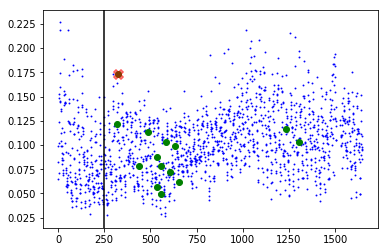




--- exchange-2_cpm_results ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [348, 360, 365, 424, 601, 606, 655, 664, 665, 730, 753, 801, 899, 951, 976, 977, 978, 1016, 1104, 1522, 1523]


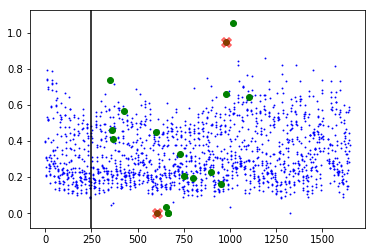




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


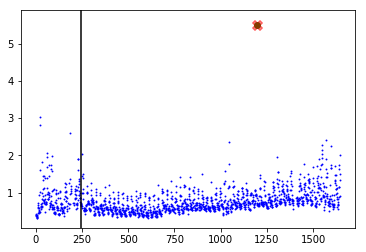




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [246, 248, 249, 250, 251, 252, 254, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 294]


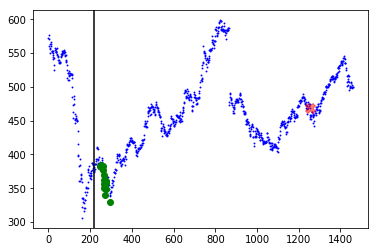




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [620, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


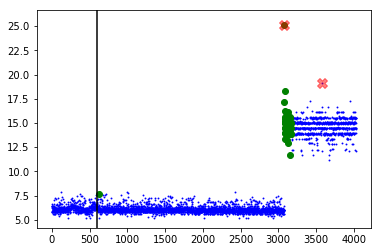




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 219]


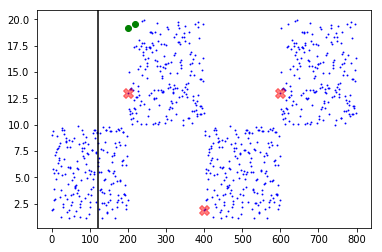




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.8
Corresponding window recall:  0.8
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3262, 3263, 3266, 3267, 5954, 5955, 8536, 8537, 8538, 8834, 8835, 8836, 8837, 8838, 8839, 10070, 10071, 10072, 10073, 10074, 10075, 10076, 10077, 10078, 10079, 10080]


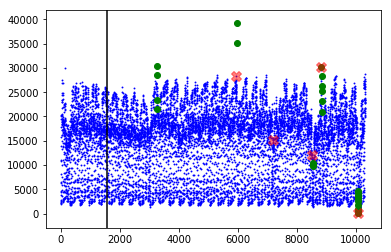




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 208, 214]


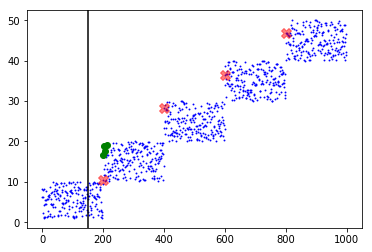

---------weight_fp=0.2, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  13.6
Best window threshold:  0.9999
Corresponding window overall precision:  0.37142857142857144
Corresponding window overall recall:  0.5909090909090909
Corresponding window overall F score:  0.456140350877193



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  1.0
Corresponding window false positives:  5
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1588, 1590, 1591, 1639, 1640, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4117, 4118, 4119, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 5899, 5900, 5901, 5902, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5942, 5943, 6631, 6632, 6633, 6

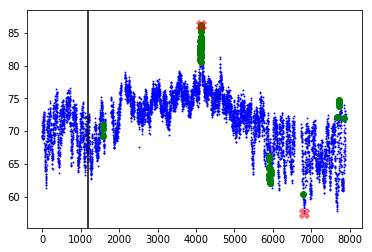




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [640, 645, 646, 647, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 693, 694, 695, 697, 700, 901, 904, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967]


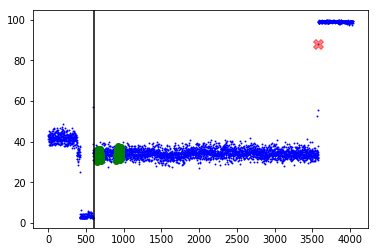




--- exchange-2_cpc_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [317, 325, 439, 489, 534, 535, 558, 559, 585, 607, 633, 655, 1234, 1306]


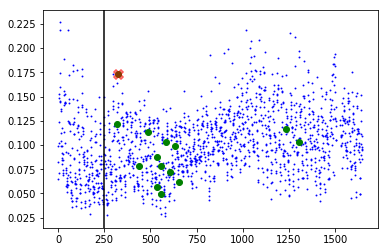




--- exchange-2_cpm_results ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [348, 360, 365, 424, 601, 606, 655, 664, 665, 730, 753, 801, 899, 951, 976, 977, 978, 1016, 1104, 1522, 1523]


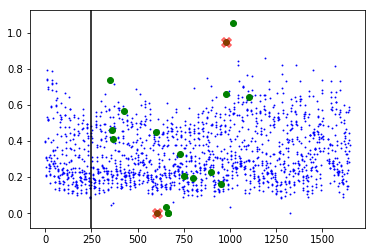




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


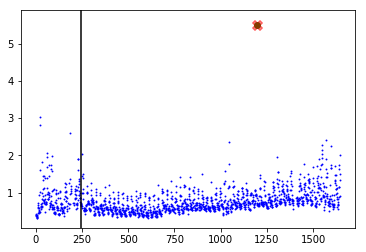




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [246, 248, 249, 250, 251, 252, 254, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 294]


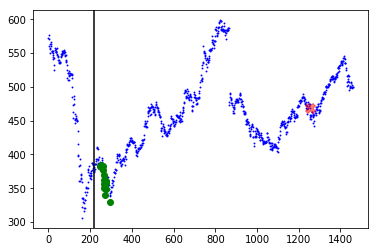




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [620, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


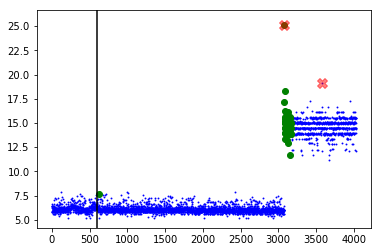




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 219]


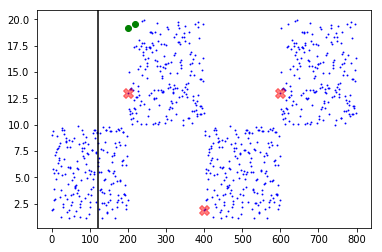




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.8
Corresponding window recall:  0.8
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3262, 3263, 3266, 3267, 5954, 5955, 8536, 8537, 8538, 8834, 8835, 8836, 8837, 8838, 8839, 10070, 10071, 10072, 10073, 10074, 10075, 10076, 10077, 10078, 10079, 10080]


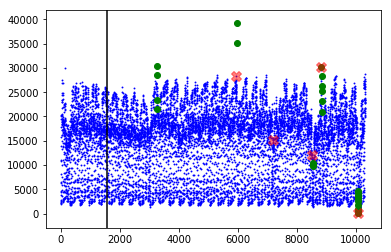




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 208, 214]


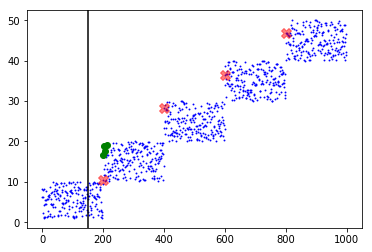

---------weight_fp=0.3, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  15.900000000000002
Best window threshold:  0.9999
Corresponding window overall precision:  0.37142857142857144
Corresponding window overall recall:  0.5909090909090909
Corresponding window overall F score:  0.456140350877193



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  1.0
Corresponding window false positives:  5
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1588, 1590, 1591, 1639, 1640, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4117, 4118, 4119, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 5899, 5900, 5901, 5902, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5942, 5943, 6631,

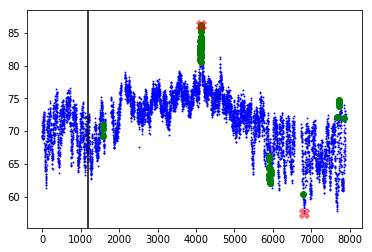




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [640, 645, 646, 647, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 693, 694, 695, 697, 700, 901, 904, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967]


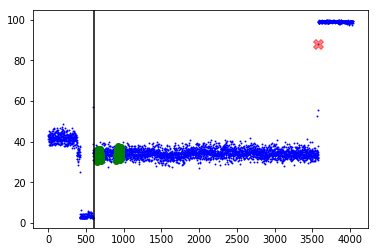




--- exchange-2_cpc_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [317, 325, 439, 489, 534, 535, 558, 559, 585, 607, 633, 655, 1234, 1306]


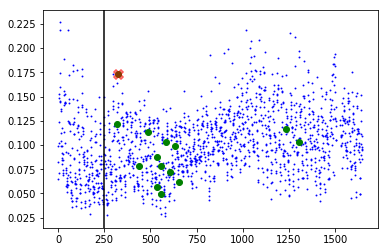




--- exchange-2_cpm_results ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [348, 360, 365, 424, 601, 606, 655, 664, 665, 730, 753, 801, 899, 951, 976, 977, 978, 1016, 1104, 1522, 1523]


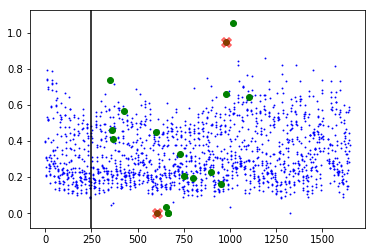




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


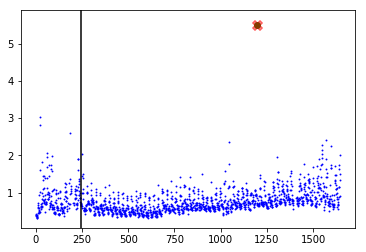




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [246, 248, 249, 250, 251, 252, 254, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 294]


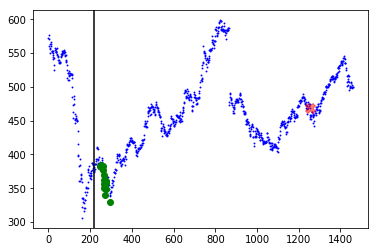




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [620, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


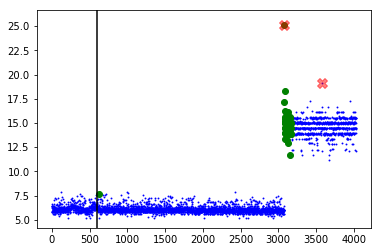




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 219]


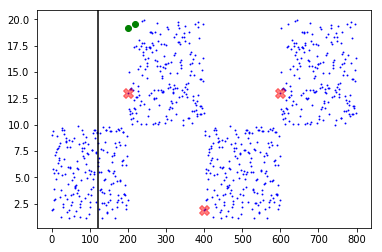




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.8
Corresponding window recall:  0.8
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3262, 3263, 3266, 3267, 5954, 5955, 8536, 8537, 8538, 8834, 8835, 8836, 8837, 8838, 8839, 10070, 10071, 10072, 10073, 10074, 10075, 10076, 10077, 10078, 10079, 10080]


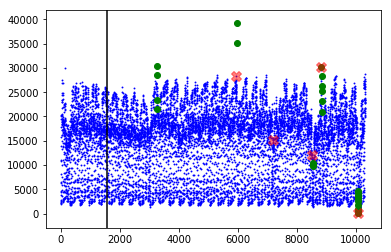




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 208, 214]


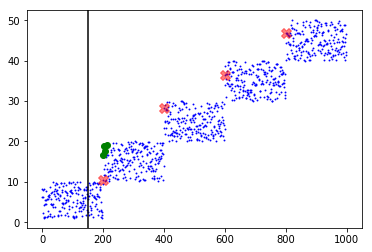

---------weight_fp=0.4, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  18.200000000000003
Best window threshold:  0.9999
Corresponding window overall precision:  0.37142857142857144
Corresponding window overall recall:  0.5909090909090909
Corresponding window overall F score:  0.456140350877193



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.2857142857142857
Corresponding window recall:  1.0
Corresponding window false positives:  5
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1588, 1590, 1591, 1639, 1640, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4117, 4118, 4119, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 5899, 5900, 5901, 5902, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5942, 5943, 6631,

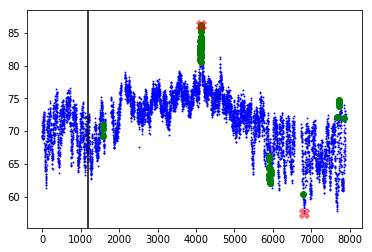




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [640, 645, 646, 647, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 693, 694, 695, 697, 700, 901, 904, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967]


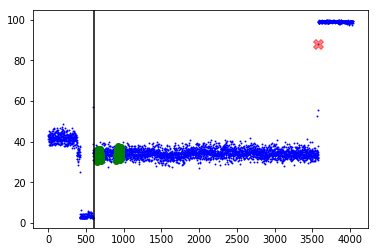




--- exchange-2_cpc_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [317, 325, 439, 489, 534, 535, 558, 559, 585, 607, 633, 655, 1234, 1306]


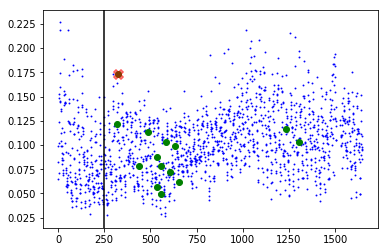




--- exchange-2_cpm_results ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [348, 360, 365, 424, 601, 606, 655, 664, 665, 730, 753, 801, 899, 951, 976, 977, 978, 1016, 1104, 1522, 1523]


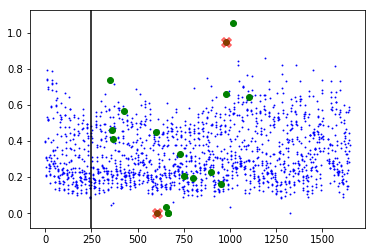




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1193, 1194]


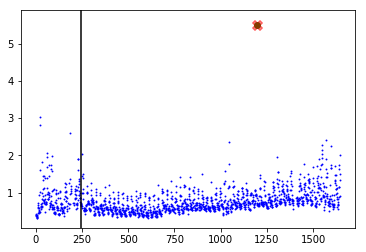




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [246, 248, 249, 250, 251, 252, 254, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 294]


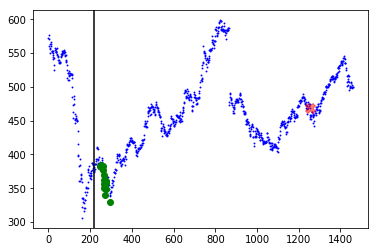




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.5
Corresponding window recall:  0.5
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [620, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


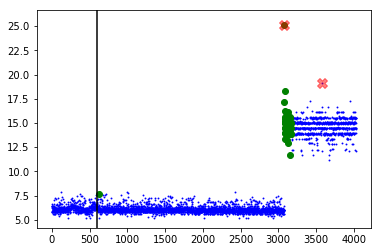




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.5
Corresponding window recall:  0.3333333333333333
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [201, 219]


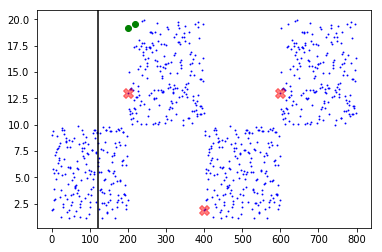




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.8
Corresponding window recall:  0.8
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3262, 3263, 3266, 3267, 5954, 5955, 8536, 8537, 8538, 8834, 8835, 8836, 8837, 8838, 8839, 10070, 10071, 10072, 10073, 10074, 10075, 10076, 10077, 10078, 10079, 10080]


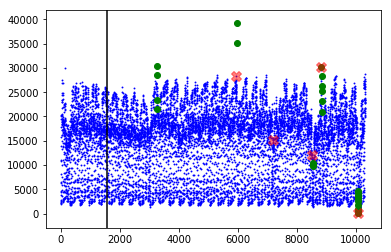




--- artificial_cd_3_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  0.25
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  [201, 203, 208, 214]


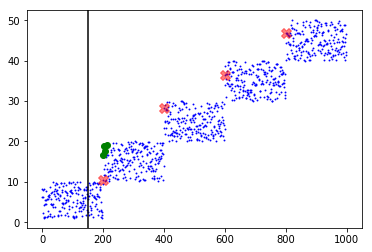

---------weight_fp=0.5, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.0
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.09090909090909091
Corresponding window overall F score:  0.16666666666666669



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


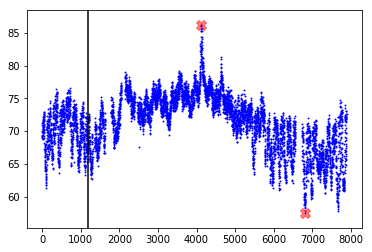




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


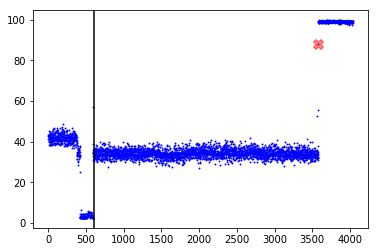




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


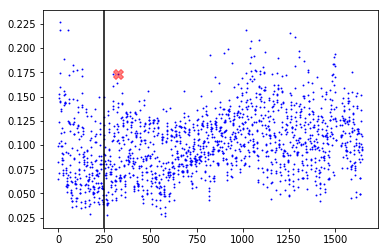




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


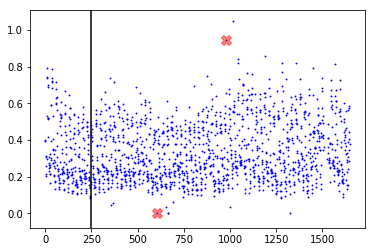




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1194]


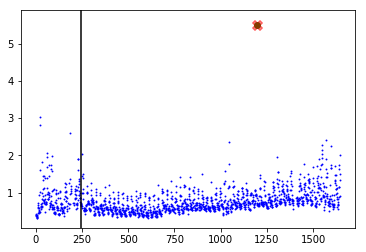




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


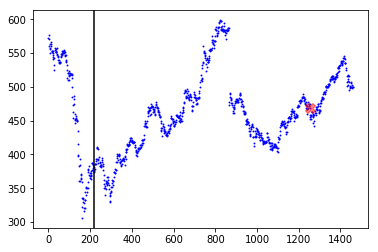




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


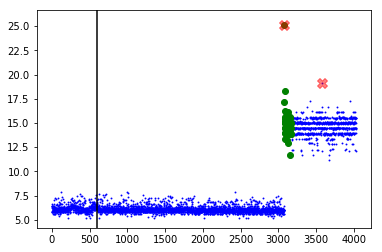




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


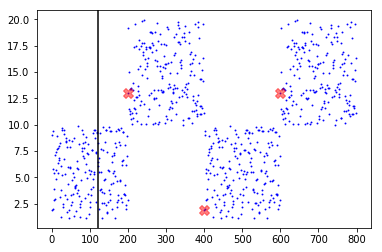




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


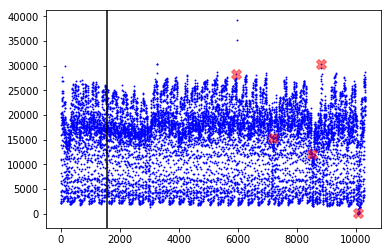




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


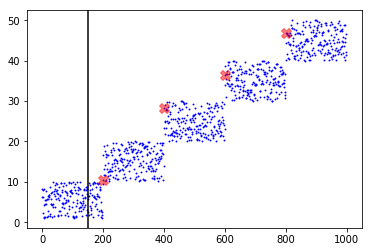

---------weight_fp=0.6, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.0
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.09090909090909091
Corresponding window overall F score:  0.16666666666666669



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


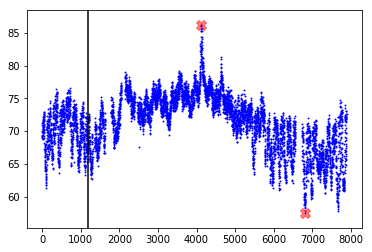




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


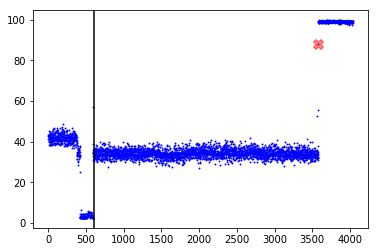




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


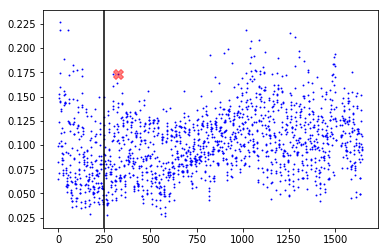




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


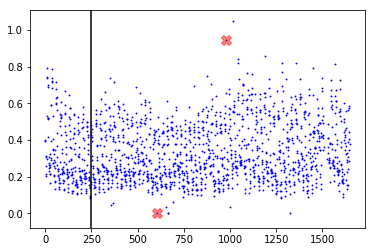




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1194]


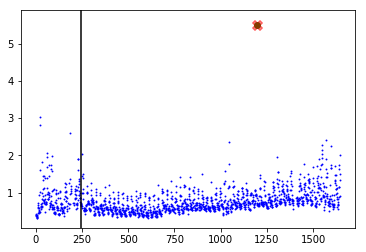




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


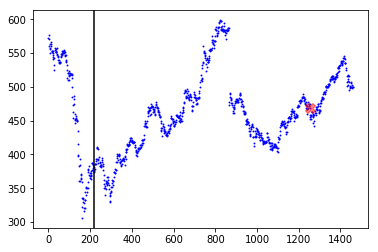




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


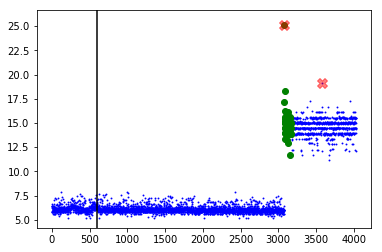




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


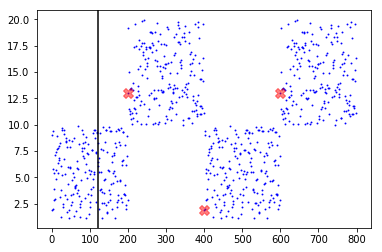




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


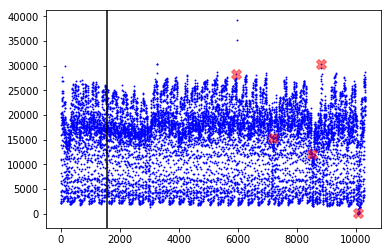




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


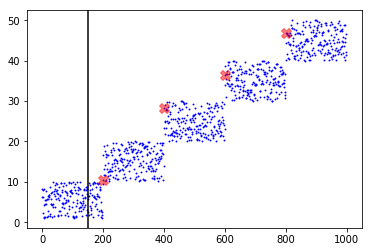

---------weight_fp=0.7, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.0
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.09090909090909091
Corresponding window overall F score:  0.16666666666666669



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


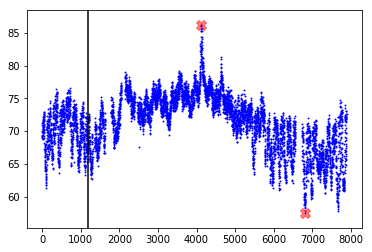




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


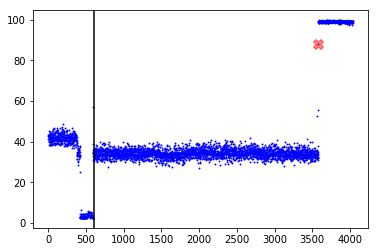




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


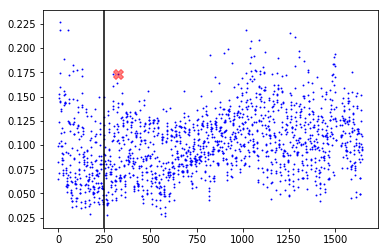




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


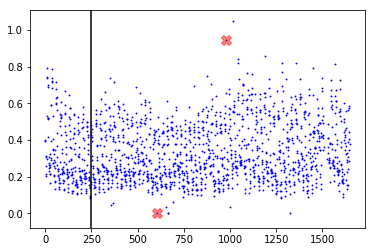




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1194]


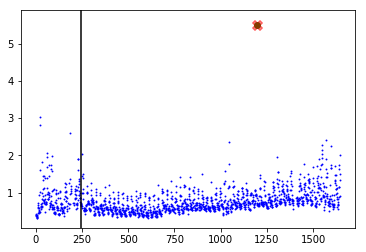




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


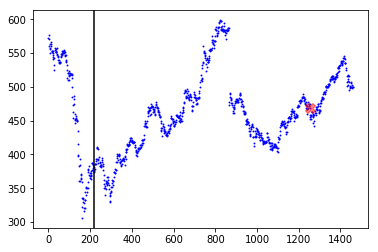




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


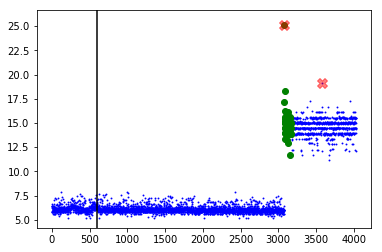




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


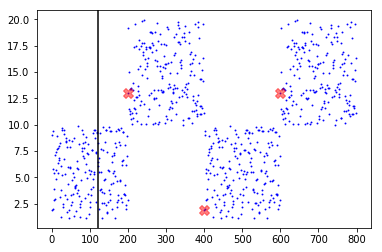




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


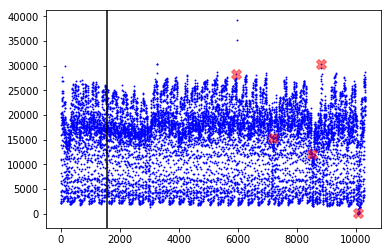




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


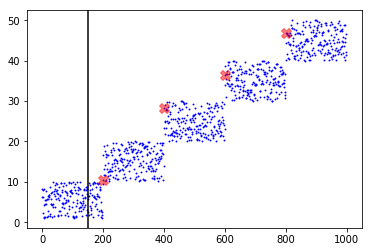

---------weight_fp=0.8, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.0
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.09090909090909091
Corresponding window overall F score:  0.16666666666666669



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


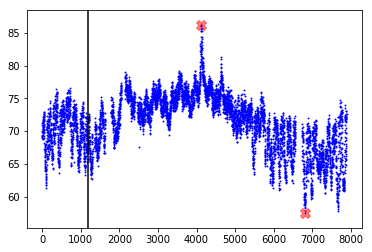




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


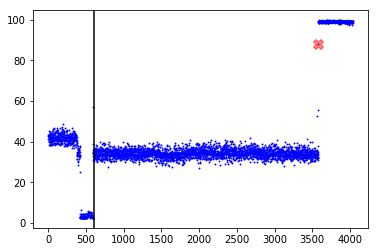




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


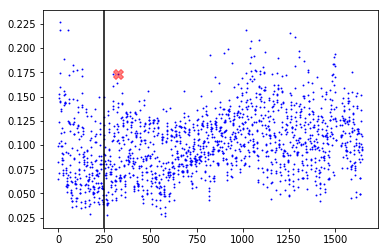




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


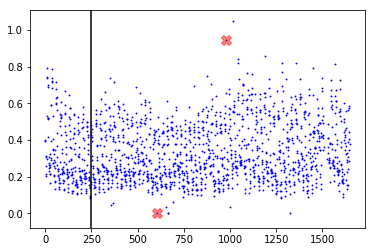




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1194]


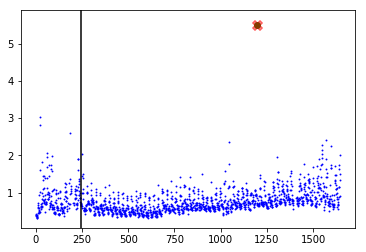




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


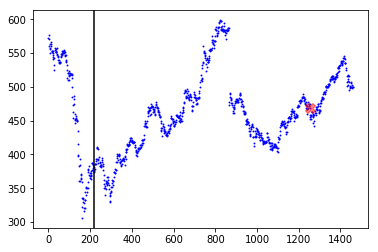




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


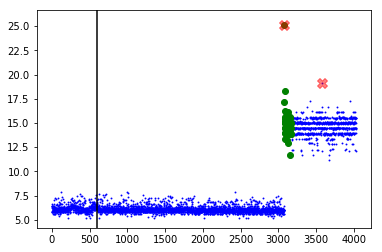




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


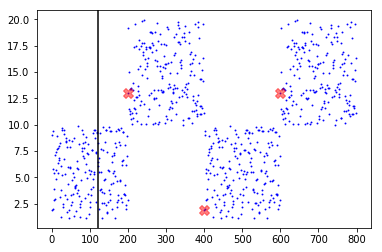




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


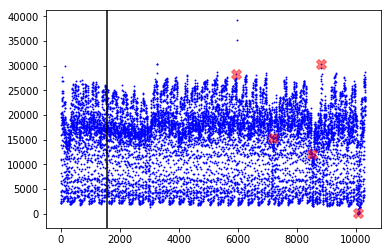




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


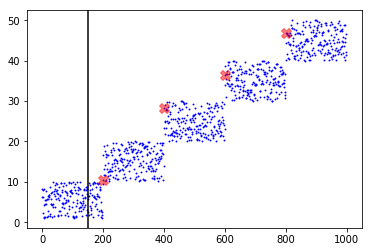

---------weight_fp=0.9, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.0
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.09090909090909091
Corresponding window overall F score:  0.16666666666666669



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


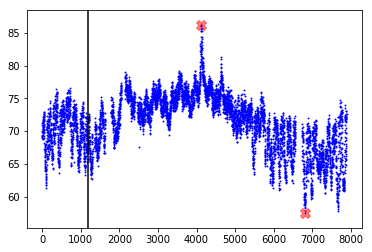




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


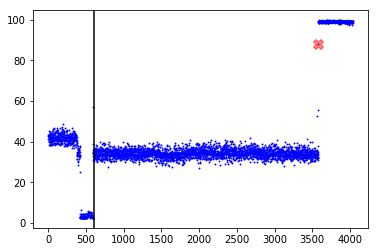




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


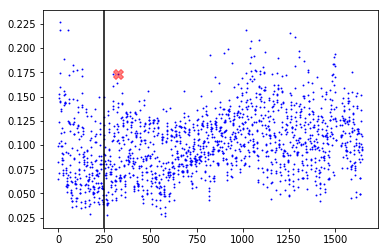




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


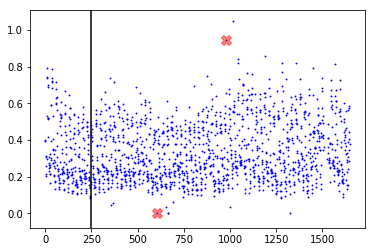




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1194]


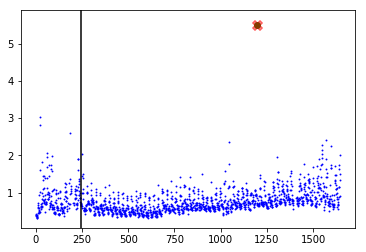




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


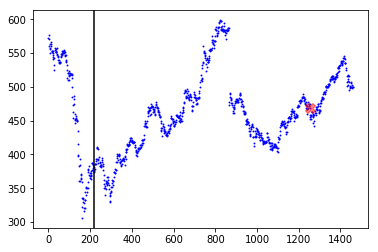




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


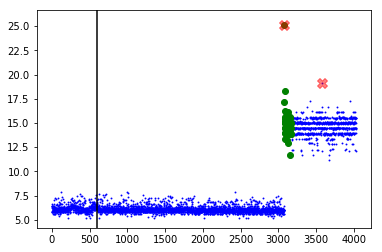




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


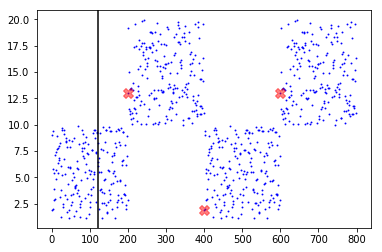




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


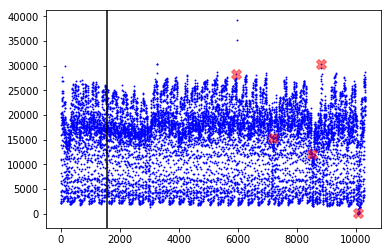




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


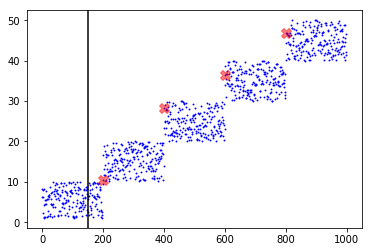

---------weight_fp=1.0, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.0
Best window threshold:  1.0
Corresponding window overall precision:  1.0
Corresponding window overall recall:  0.09090909090909091
Corresponding window overall F score:  0.16666666666666669



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


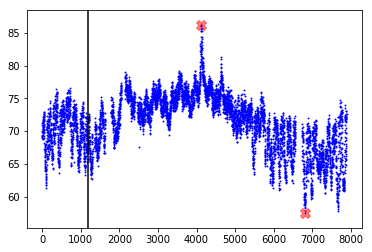




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


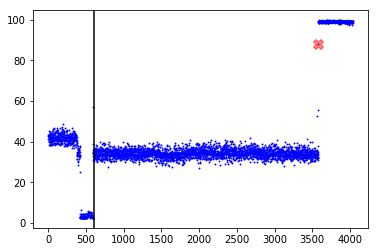




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


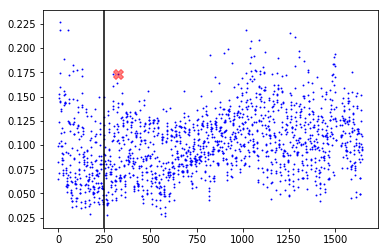




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


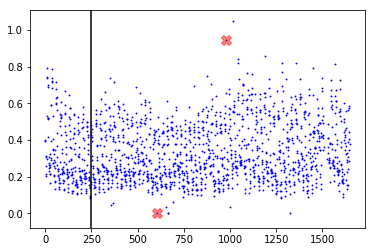




--- exchange-3_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1194]


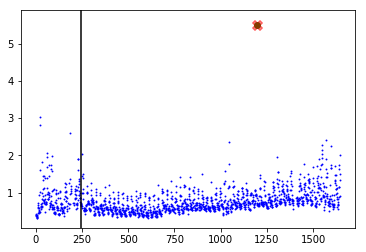




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


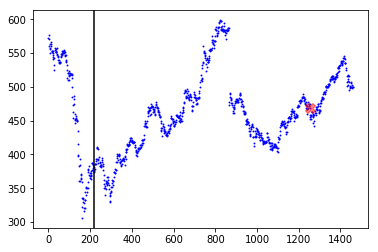




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167]


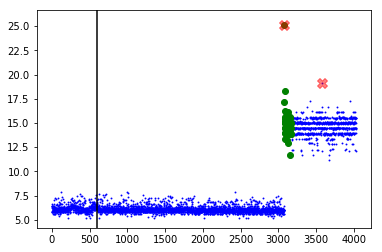




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


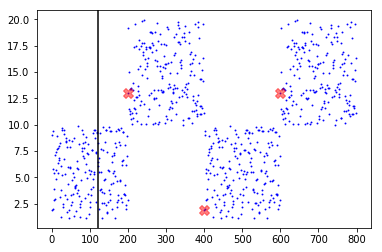




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


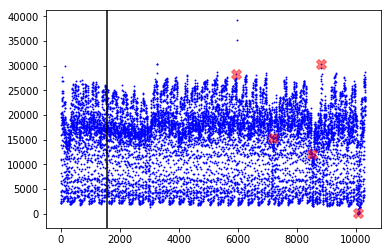




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  []


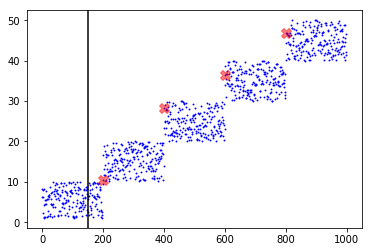

------------
False Positive Weight:  0.1
	 Minimum number of mistakes : 11.299999999999999
	 Best window threshold : 0.9999
	 Corresponding window overall precision : 0.37142857142857144
	 Corresponding window overall recall : 0.5909090909090909
	 Corresponding window overall F score : 0.456140350877193
False Positive Weight:  0.2
	 Minimum number of mistakes : 13.6
	 Best window threshold : 0.9999
	 Corresponding window overall precision : 0.37142857142857144
	 Corresponding window overall recall : 0.5909090909090909
	 Corresponding window overall F score : 0.456140350877193
False Positive Weight:  0.3
	 Minimum number of mistakes : 15.900000000000002
	 Best window threshold : 0.9999
	 Corresponding window overall precision : 0.37142857142857144
	 Corresponding window overall recall : 0.5909090909090909
	 Corresponding window overall F score : 0.456140350877193
False Positive Weight:  0.4
	 Minimum number of mistakes : 18.200000000000003
	 Best window threshold : 0.9999
	 Correspondin

In [21]:
end_results = {}
for weight_fp in weight_fp_list:  
    print("---------weight_fp=" + str(weight_fp) + ", weight_fn=1----------")
    weight_result = adclasses.pretty_print_results(ad_dict, anomaly_scores_dict, true_outlier_indices_dict, weight_fp=weight_fp, weight_fn=1)
    end_results[weight_fp] = weight_result

print("------------")
adclasses.pretty_print_end_results(end_results)

# GLM Results

In [26]:
anomaly_scores_dict = {}

for dataset_name in dataset_name_list:
    output_dict_glm = joblib.load("anomaly_scores" + window_size + "/GLM/" + dataset_name)
    anomaly_scores_dict[dataset_name] = output_dict_glm["Anomaly Scores"]

In [27]:
adclasses.precision_recall_curve_info(anomaly_scores_dict, true_outlier_indices_dict)

{0.1: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.2: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.3: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.4: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.5: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.6: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.7: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.8: {'precision': 0.1111111111111111, 'recall': 1.0},
 0.9: {'precision': 0.11428571428571428, 'recall': 1.0},
 1.0: {'precision': 0.0, 'recall': 0.0}}

---------weight_fp=0.1, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  6.000000000000001
Best window threshold:  0.9998
Corresponding window overall precision:  0.3220338983050847
Corresponding window overall recall:  0.8636363636363636
Corresponding window overall F score:  0.46913580246913583



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4104, 4105, 4106, 4107, 4109, 4110, 4112, 4113, 4115, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 5463, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 6816]


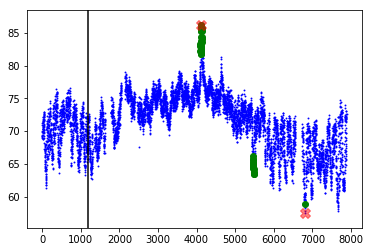




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  4
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [607, 608, 609, 619, 620, 2131, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2436, 2437, 2438, 2442, 2443, 2444, 2445, 2454, 2456, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3619, 3620, 3859, 3860, 3861, 3862, 3863, 3864, 3865]


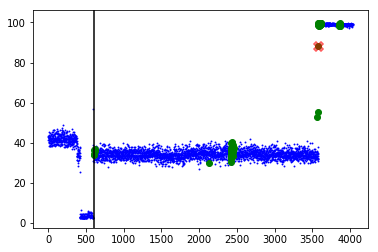




--- exchange-2_cpc_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [325, 824, 1046, 1484, 1485, 1486, 1487, 1520]


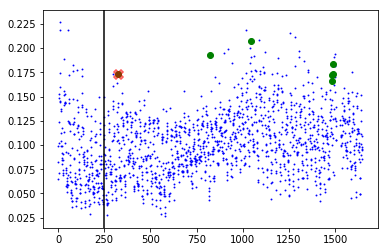




--- exchange-2_cpm_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  6
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [601, 664, 665, 802, 899, 951, 976, 977, 978, 1002, 1016, 1104, 1520, 1521, 1522]


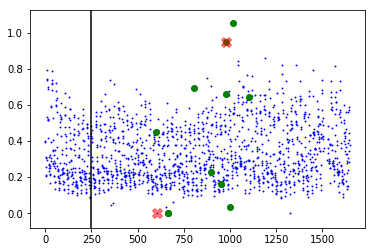




--- exchange-3_cpm_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [836, 1021, 1044, 1045, 1193, 1194, 1218, 1242, 1531, 1536, 1571]


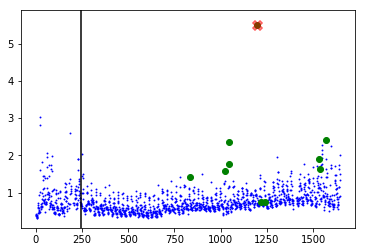




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [272, 303, 364, 365, 395, 423, 515, 637, 668, 698, 729, 760, 789, 820, 850, 867, 1095, 1126, 1154, 1185, 1399, 1429]


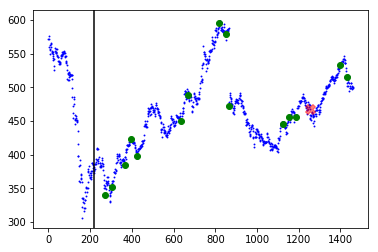




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.16666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  10
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [620, 683, 708, 718, 920, 992, 1006, 1208, 1498, 1534, 1569, 1880, 2082, 2426, 2650, 2801, 2971, 2996, 3032, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3108, 3110, 3112, 3114, 3116, 3118, 3126, 3128, 3282, 3283, 3284, 3570]


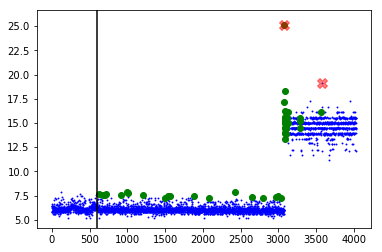




--- artificial_cd_1_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [201, 399, 599]


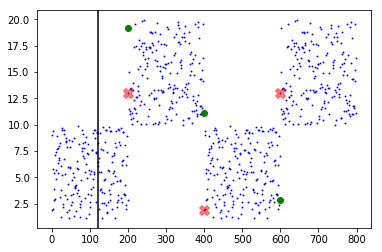




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.42857142857142855
Corresponding window recall:  0.6
Corresponding window false positives:  4
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [3214, 3264, 4572, 5949, 5950, 7686, 7687, 7734, 7735, 8824, 8825, 8826, 8827, 8828, 8829, 8830, 9175, 10067]


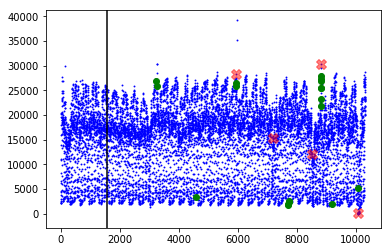




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [200, 202, 398, 576, 599, 797, 864]


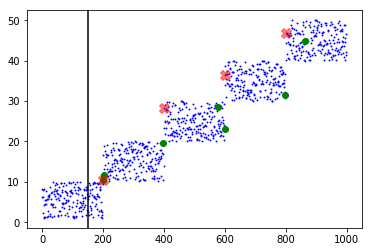

---------weight_fp=0.2, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  10.000000000000002
Best window threshold:  0.9998
Corresponding window overall precision:  0.3220338983050847
Corresponding window overall recall:  0.8636363636363636
Corresponding window overall F score:  0.46913580246913583



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4104, 4105, 4106, 4107, 4109, 4110, 4112, 4113, 4115, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 5463, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 6816]


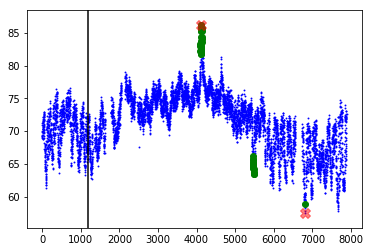




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  4
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [607, 608, 609, 619, 620, 2131, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2436, 2437, 2438, 2442, 2443, 2444, 2445, 2454, 2456, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3619, 3620, 3859, 3860, 3861, 3862, 3863, 3864, 3865]


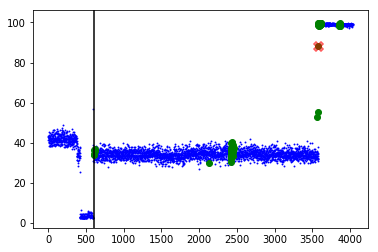




--- exchange-2_cpc_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [325, 824, 1046, 1484, 1485, 1486, 1487, 1520]


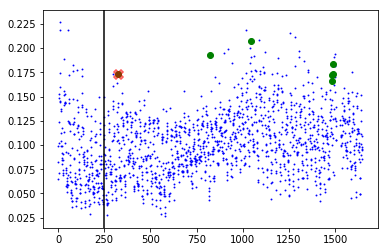




--- exchange-2_cpm_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  6
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [601, 664, 665, 802, 899, 951, 976, 977, 978, 1002, 1016, 1104, 1520, 1521, 1522]


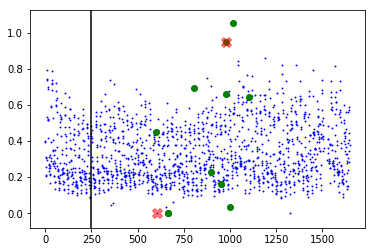




--- exchange-3_cpm_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [836, 1021, 1044, 1045, 1193, 1194, 1218, 1242, 1531, 1536, 1571]


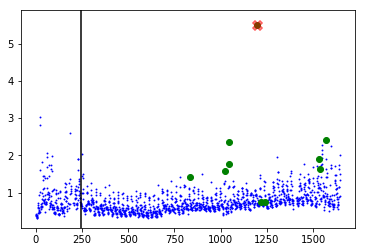




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [272, 303, 364, 365, 395, 423, 515, 637, 668, 698, 729, 760, 789, 820, 850, 867, 1095, 1126, 1154, 1185, 1399, 1429]


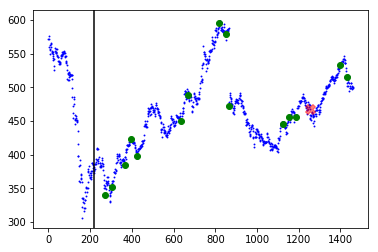




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.16666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  10
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [620, 683, 708, 718, 920, 992, 1006, 1208, 1498, 1534, 1569, 1880, 2082, 2426, 2650, 2801, 2971, 2996, 3032, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3108, 3110, 3112, 3114, 3116, 3118, 3126, 3128, 3282, 3283, 3284, 3570]


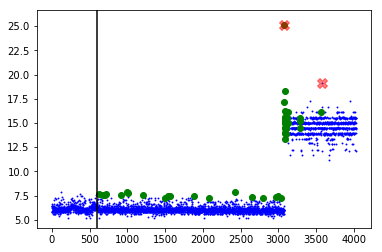




--- artificial_cd_1_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [201, 399, 599]


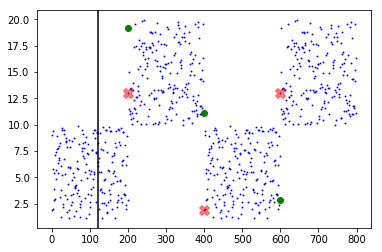




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.42857142857142855
Corresponding window recall:  0.6
Corresponding window false positives:  4
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [3214, 3264, 4572, 5949, 5950, 7686, 7687, 7734, 7735, 8824, 8825, 8826, 8827, 8828, 8829, 8830, 9175, 10067]


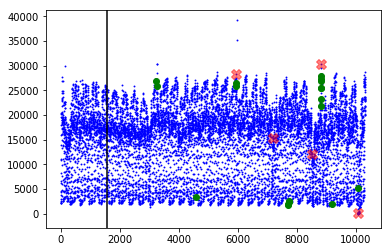




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [200, 202, 398, 576, 599, 797, 864]


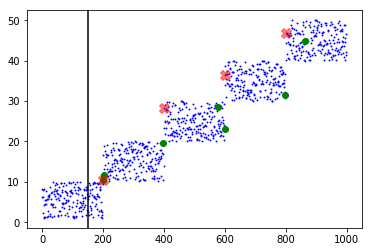

---------weight_fp=0.3, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  13.999999999999998
Best window threshold:  0.9998
Corresponding window overall precision:  0.3220338983050847
Corresponding window overall recall:  0.8636363636363636
Corresponding window overall F score:  0.46913580246913583



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4104, 4105, 4106, 4107, 4109, 4110, 4112, 4113, 4115, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 5463, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 6816]


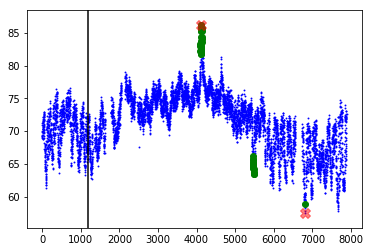




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  4
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [607, 608, 609, 619, 620, 2131, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2436, 2437, 2438, 2442, 2443, 2444, 2445, 2454, 2456, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3619, 3620, 3859, 3860, 3861, 3862, 3863, 3864, 3865]


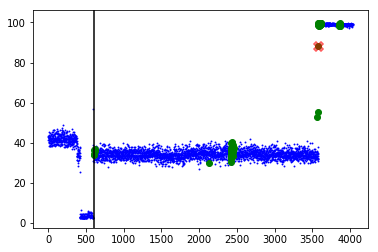




--- exchange-2_cpc_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [325, 824, 1046, 1484, 1485, 1486, 1487, 1520]


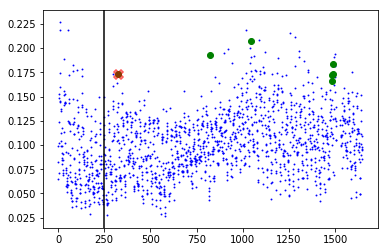




--- exchange-2_cpm_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  6
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [601, 664, 665, 802, 899, 951, 976, 977, 978, 1002, 1016, 1104, 1520, 1521, 1522]


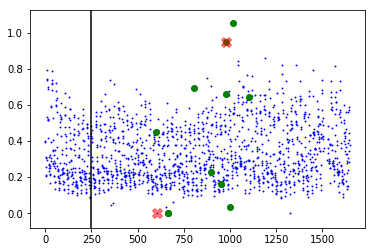




--- exchange-3_cpm_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [836, 1021, 1044, 1045, 1193, 1194, 1218, 1242, 1531, 1536, 1571]


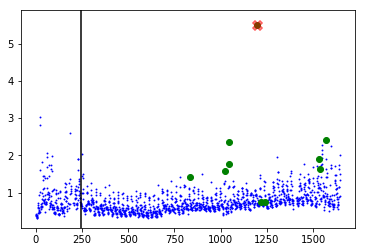




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [272, 303, 364, 365, 395, 423, 515, 637, 668, 698, 729, 760, 789, 820, 850, 867, 1095, 1126, 1154, 1185, 1399, 1429]


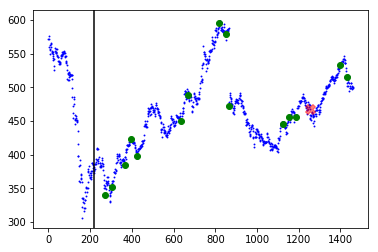




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.16666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  10
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [620, 683, 708, 718, 920, 992, 1006, 1208, 1498, 1534, 1569, 1880, 2082, 2426, 2650, 2801, 2971, 2996, 3032, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3108, 3110, 3112, 3114, 3116, 3118, 3126, 3128, 3282, 3283, 3284, 3570]


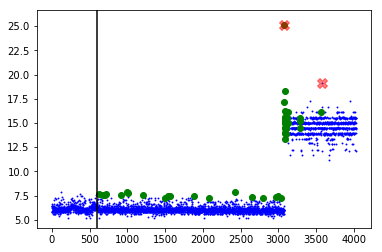




--- artificial_cd_1_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [201, 399, 599]


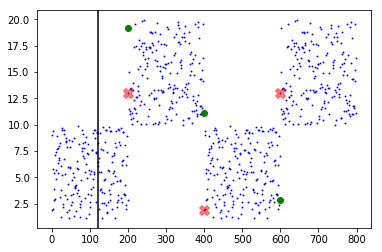




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.42857142857142855
Corresponding window recall:  0.6
Corresponding window false positives:  4
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [3214, 3264, 4572, 5949, 5950, 7686, 7687, 7734, 7735, 8824, 8825, 8826, 8827, 8828, 8829, 8830, 9175, 10067]


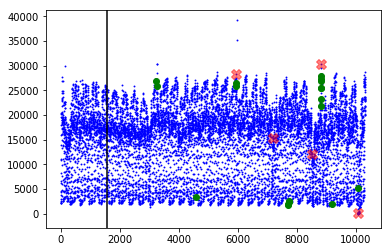




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [200, 202, 398, 576, 599, 797, 864]


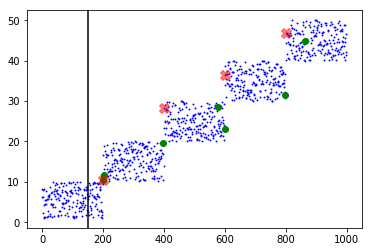

---------weight_fp=0.4, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  18.000000000000004
Best window threshold:  0.9998
Corresponding window overall precision:  0.3220338983050847
Corresponding window overall recall:  0.8636363636363636
Corresponding window overall F score:  0.46913580246913583



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [4100, 4101, 4102, 4104, 4105, 4106, 4107, 4109, 4110, 4112, 4113, 4115, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 5463, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 6816]


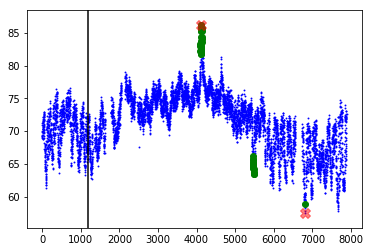




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.2
Corresponding window recall:  1.0
Corresponding window false positives:  4
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [607, 608, 609, 619, 620, 2131, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2436, 2437, 2438, 2442, 2443, 2444, 2445, 2454, 2456, 3567, 3568, 3569, 3570, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3619, 3620, 3859, 3860, 3861, 3862, 3863, 3864, 3865]


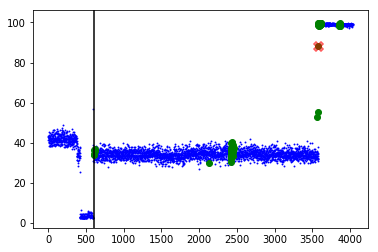




--- exchange-2_cpc_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [325, 824, 1046, 1484, 1485, 1486, 1487, 1520]


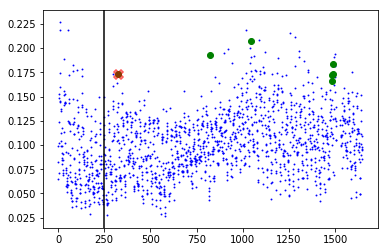




--- exchange-2_cpm_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  6
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [601, 664, 665, 802, 899, 951, 976, 977, 978, 1002, 1016, 1104, 1520, 1521, 1522]


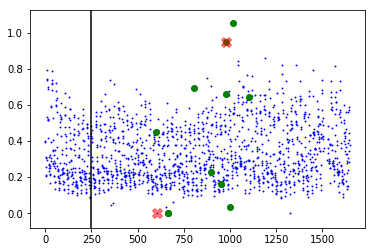




--- exchange-3_cpm_results ---
Corresponding window precision:  0.25
Corresponding window recall:  1.0
Corresponding window false positives:  3
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [836, 1021, 1044, 1045, 1193, 1194, 1218, 1242, 1531, 1536, 1571]


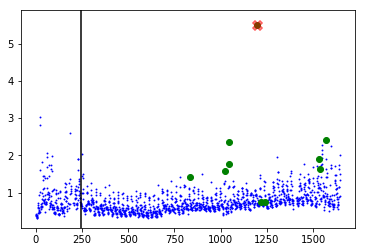




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.125
Corresponding window recall:  1.0
Corresponding window false positives:  7
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [272, 303, 364, 365, 395, 423, 515, 637, 668, 698, 729, 760, 789, 820, 850, 867, 1095, 1126, 1154, 1185, 1399, 1429]


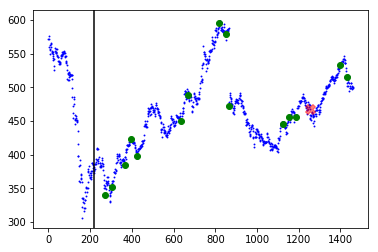




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  0.16666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  10
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [620, 683, 708, 718, 920, 992, 1006, 1208, 1498, 1534, 1569, 1880, 2082, 2426, 2650, 2801, 2971, 2996, 3032, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3108, 3110, 3112, 3114, 3116, 3118, 3126, 3128, 3282, 3283, 3284, 3570]


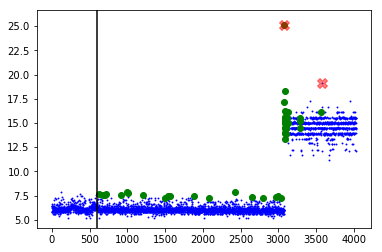




--- artificial_cd_1_random_removal ---
Corresponding window precision:  1.0
Corresponding window recall:  1.0
Corresponding window false positives:  0
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [201, 399, 599]


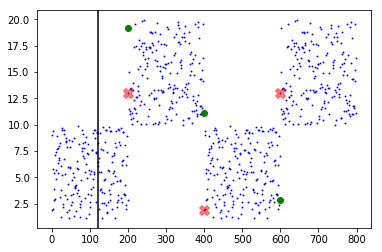




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.42857142857142855
Corresponding window recall:  0.6
Corresponding window false positives:  4
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [3214, 3264, 4572, 5949, 5950, 7686, 7687, 7734, 7735, 8824, 8825, 8826, 8827, 8828, 8829, 8830, 9175, 10067]


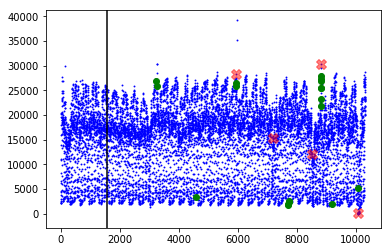




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.6666666666666666
Corresponding window recall:  1.0
Corresponding window false positives:  2
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [200, 202, 398, 576, 599, 797, 864]


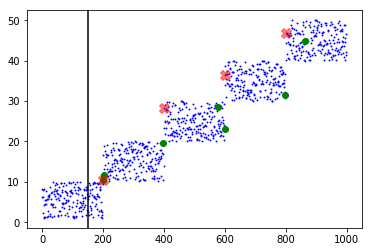

---------weight_fp=0.5, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  19.5
Best window threshold:  1.0
Corresponding window overall precision:  0.5
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.26666666666666666



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


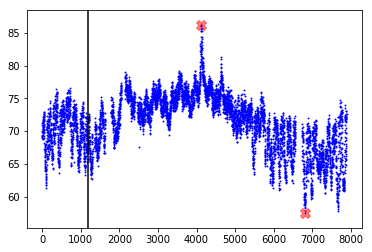




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3568, 3569, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587]


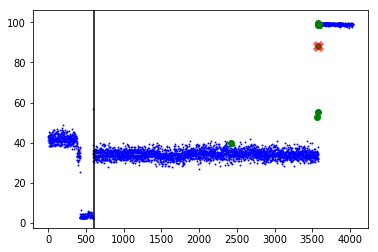




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


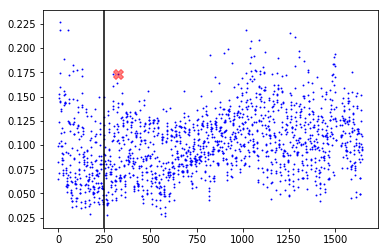




--- exchange-2_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977]


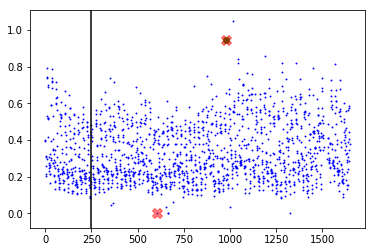




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


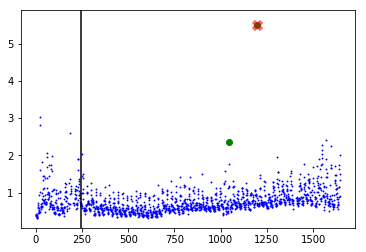




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


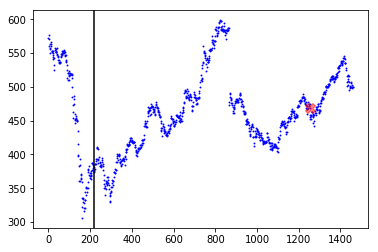




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3089, 3090]


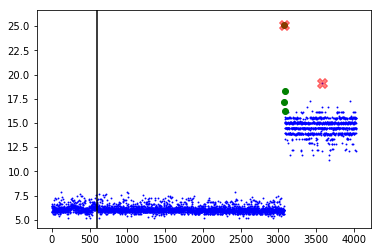




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


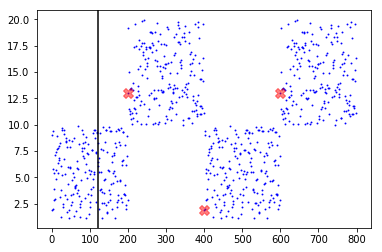




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


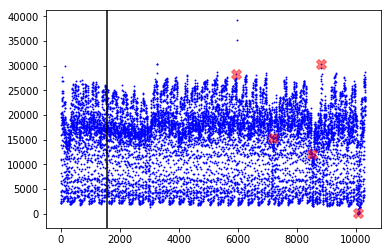




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


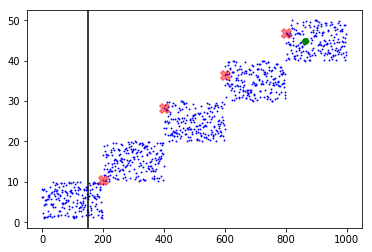

---------weight_fp=0.6, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  19.799999999999997
Best window threshold:  1.0
Corresponding window overall precision:  0.5
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.26666666666666666



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


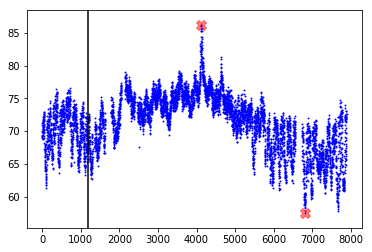




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3568, 3569, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587]


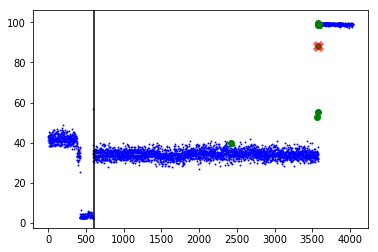




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


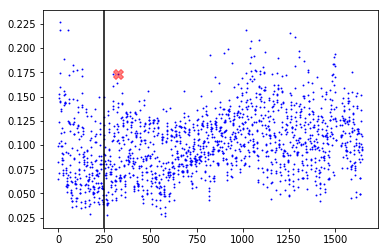




--- exchange-2_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977]


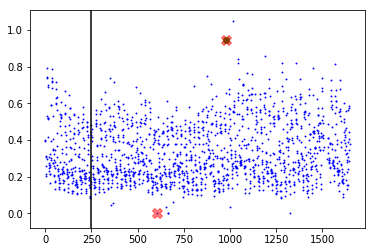




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


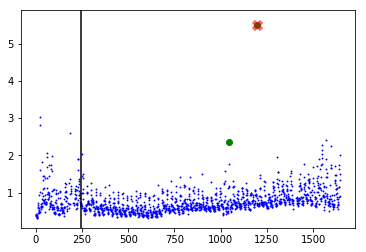




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


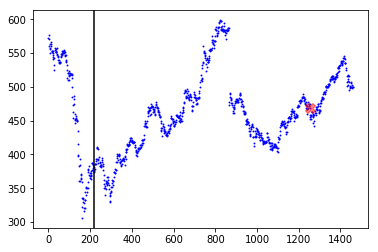




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3089, 3090]


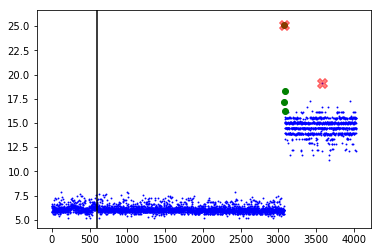




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


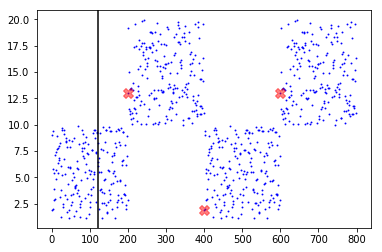




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


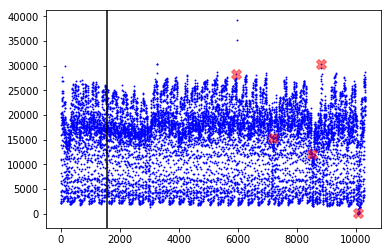




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


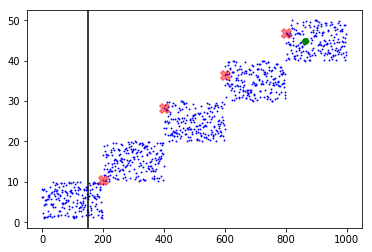

---------weight_fp=0.7, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.1
Best window threshold:  1.0
Corresponding window overall precision:  0.5
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.26666666666666666



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


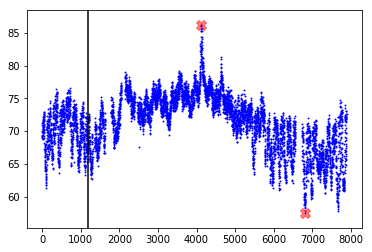




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3568, 3569, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587]


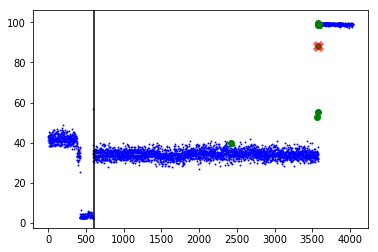




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


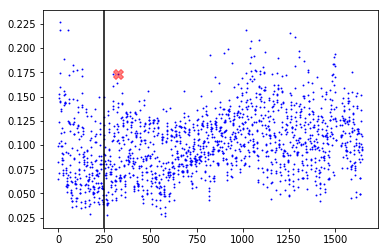




--- exchange-2_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977]


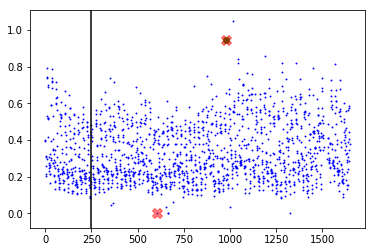




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


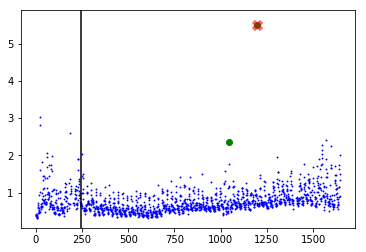




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


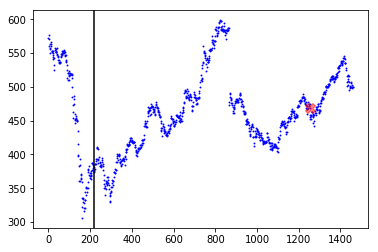




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3089, 3090]


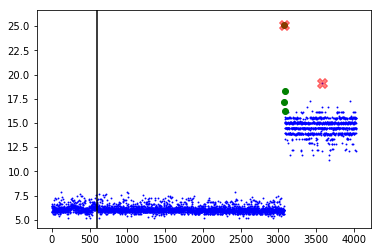




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


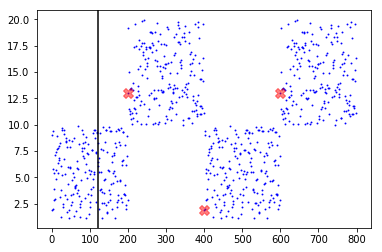




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


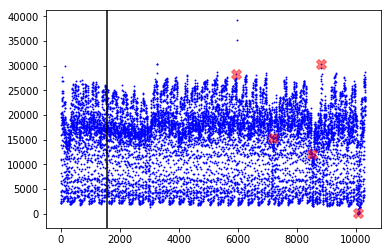




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


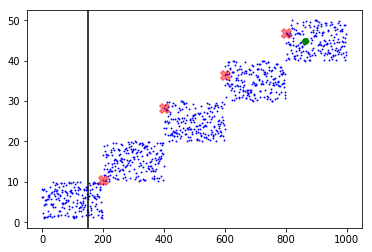

---------weight_fp=0.8, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.4
Best window threshold:  1.0
Corresponding window overall precision:  0.5
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.26666666666666666



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


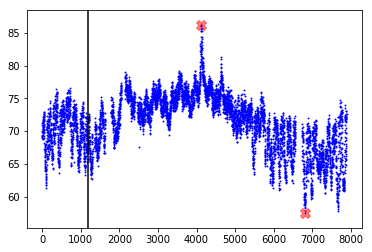




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3568, 3569, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587]


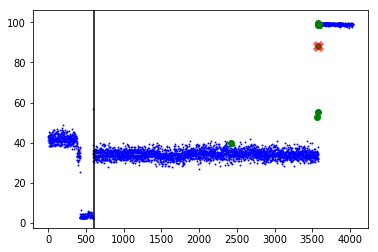




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


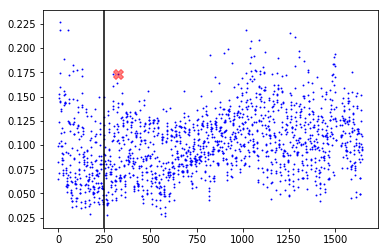




--- exchange-2_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977]


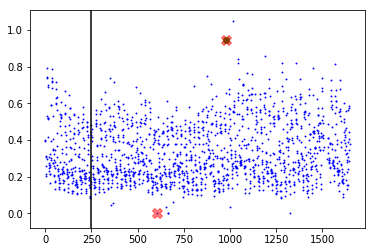




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


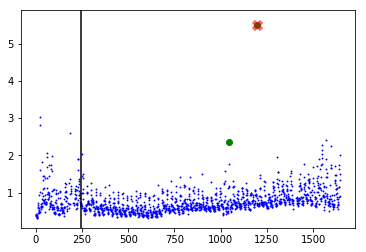




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


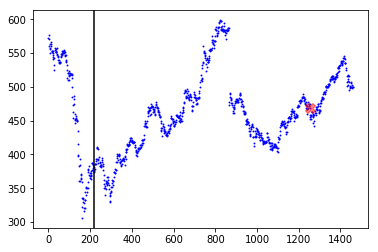




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3089, 3090]


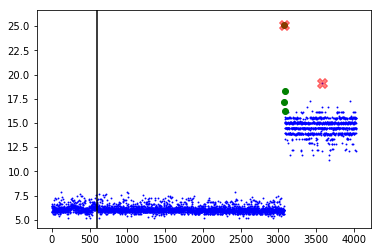




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


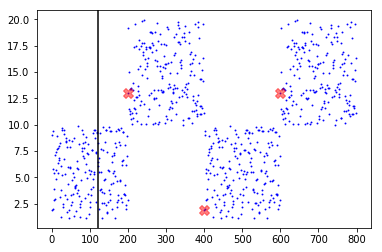




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


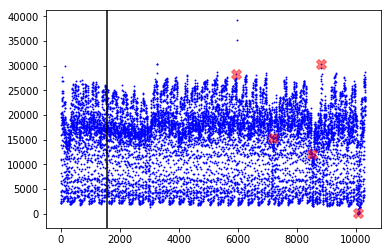




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


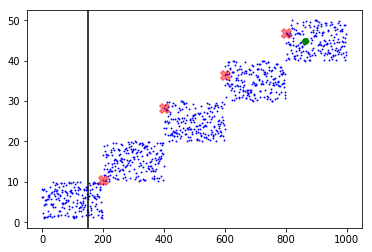

---------weight_fp=0.9, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.700000000000003
Best window threshold:  1.0
Corresponding window overall precision:  0.5
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.26666666666666666



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


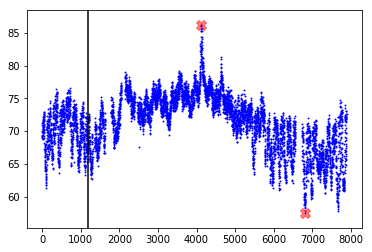




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3568, 3569, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587]


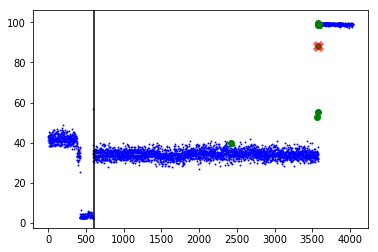




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


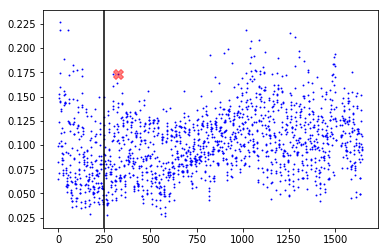




--- exchange-2_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977]


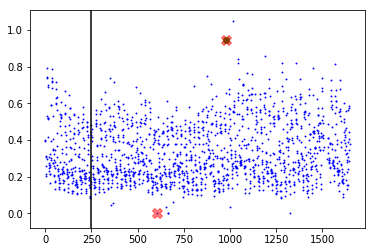




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


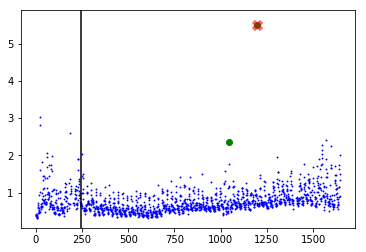




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


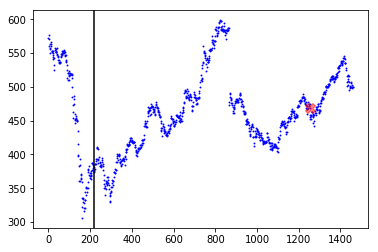




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3089, 3090]


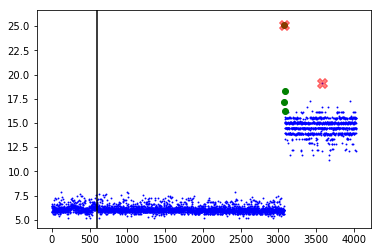




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


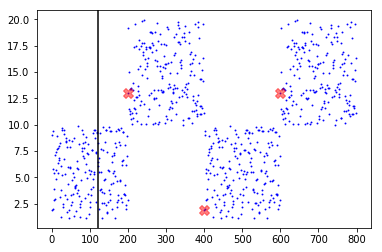




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


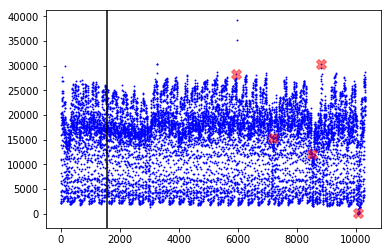




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


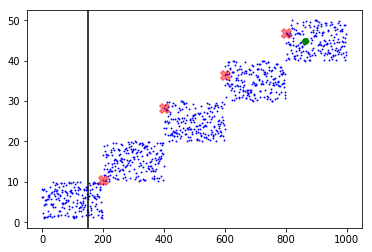

---------weight_fp=1.0, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  21.0
Best window threshold:  1.0
Corresponding window overall precision:  0.5
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.26666666666666666



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  []


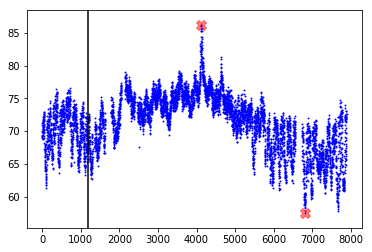




--- ec2_cpu_utilization_ac20cd ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [2420, 3567, 3568, 3569, 3571, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587]


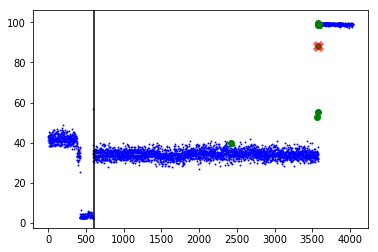




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


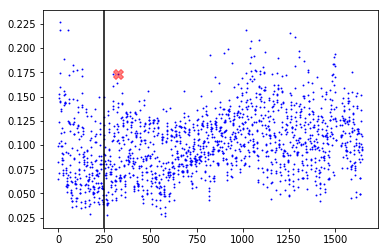




--- exchange-2_cpm_results ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [977]


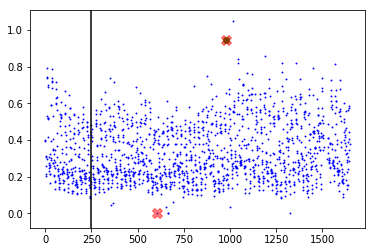




--- exchange-3_cpm_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1044, 1193, 1194]


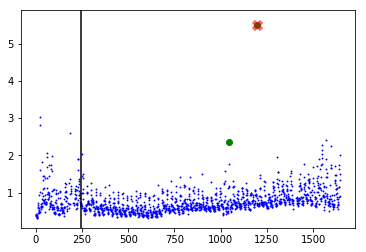




--- ibm-common-stock-closing-prices ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  []


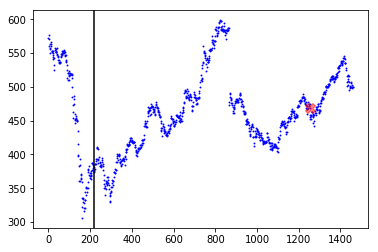




--- rds_cpu_utilization_cc0c53 ---
Corresponding window precision:  1.0
Corresponding window recall:  0.5
Corresponding window false positives:  0
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [3080, 3081, 3082, 3089, 3090]


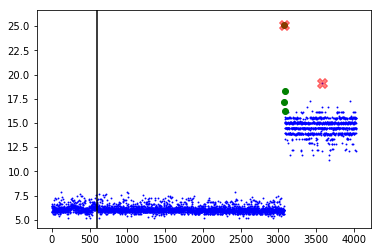




--- artificial_cd_1_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  3


Outlier indices as determined by best window threshold:  []


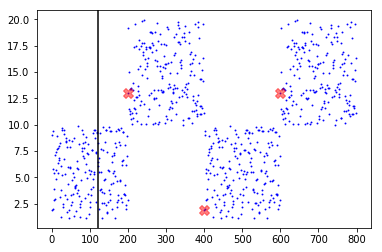




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  0
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  []


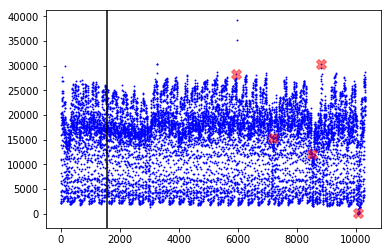




--- artificial_cd_3_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [864]


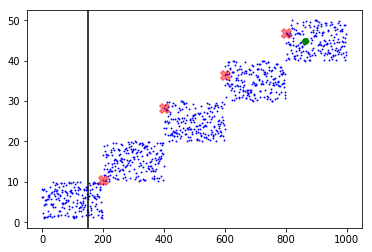

------------
False Positive Weight:  0.1
	 Minimum number of mistakes : 6.000000000000001
	 Best window threshold : 0.9998
	 Corresponding window overall precision : 0.3220338983050847
	 Corresponding window overall recall : 0.8636363636363636
	 Corresponding window overall F score : 0.46913580246913583
False Positive Weight:  0.2
	 Minimum number of mistakes : 10.000000000000002
	 Best window threshold : 0.9998
	 Corresponding window overall precision : 0.3220338983050847
	 Corresponding window overall recall : 0.8636363636363636
	 Corresponding window overall F score : 0.46913580246913583
False Positive Weight:  0.3
	 Minimum number of mistakes : 13.999999999999998
	 Best window threshold : 0.9998
	 Corresponding window overall precision : 0.3220338983050847
	 Corresponding window overall recall : 0.8636363636363636
	 Corresponding window overall F score : 0.46913580246913583
False Positive Weight:  0.4
	 Minimum number of mistakes : 18.000000000000004
	 Best window threshold : 0.999

In [28]:
end_results = {}
for weight_fp in weight_fp_list:  
    print("---------weight_fp=" + str(weight_fp) + ", weight_fn=1----------")
    weight_result = adclasses.pretty_print_results(ad_dict, anomaly_scores_dict, true_outlier_indices_dict, weight_fp=weight_fp, weight_fn=1)
    end_results[weight_fp] = weight_result

print("------------")
adclasses.pretty_print_end_results(end_results)

# STL Residual Results

In [29]:
stl_dataset_name_list = ["ambient_temperature_system_failure",
                         "exchange-2_cpc_results",
                         "exchange-2_cpm_results",
                         "exchange-3_cpm_results",
                         "nyc_taxi_random_removal"]

stl_ad_dict = {}
for dataset_name in stl_dataset_name_list:
    stl_ad_dict[dataset_name] = ad_dict[dataset_name]
    
stl_true_outlier_indices_dict = {}
for dataset_name in stl_dataset_name_list:
    stl_true_outlier_indices_dict[dataset_name] = true_outlier_indices_dict[dataset_name]

In [30]:
anomaly_scores_dict = {}

for dataset_name in stl_dataset_name_list:
    output_dict_stl = joblib.load("anomaly_scores" + window_size + "/stl/" + dataset_name)
    anomaly_scores_dict[dataset_name] = output_dict_stl["Anomaly Scores"]

In [31]:
adclasses.precision_recall_curve_info(anomaly_scores_dict, stl_true_outlier_indices_dict)

{0.1: {'precision': 0.11627906976744186, 'recall': 1.0},
 0.2: {'precision': 0.11627906976744186, 'recall': 1.0},
 0.3: {'precision': 0.11627906976744186, 'recall': 1.0},
 0.4: {'precision': 0.11627906976744186, 'recall': 1.0},
 0.5: {'precision': 0.11627906976744186, 'recall': 1.0},
 0.6: {'precision': 0.0, 'recall': 0.0},
 0.7: {'precision': 0.0, 'recall': 0.0},
 0.8: {'precision': 0.0, 'recall': 0.0},
 0.9: {'precision': 0.0, 'recall': 0.0},
 1.0: {'precision': 0.0, 'recall': 0.0}}

---------weight_fp=0.1, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  8.6
Best window threshold:  0.0
Corresponding window overall precision:  0.11224489795918367
Corresponding window overall recall:  1.0
Corresponding window overall F score:  0.20183486238532108



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  16
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253,

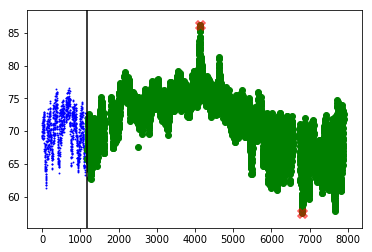




--- exchange-2_cpc_results ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394

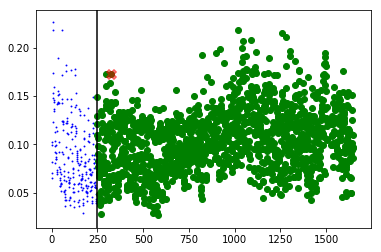




--- exchange-2_cpm_results ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  16
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 39

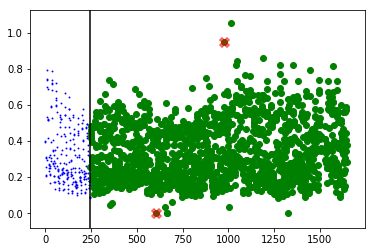




--- exchange-3_cpm_results ---
Corresponding window precision:  0.1111111111111111
Corresponding window recall:  1.0
Corresponding window false positives:  8
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394

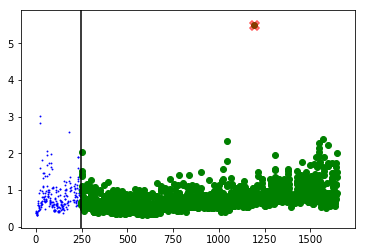




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.11627906976744186
Corresponding window recall:  1.0
Corresponding window false positives:  38
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 167

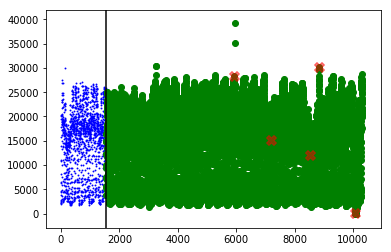

---------weight_fp=0.2, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  12.400000000000002
Best window threshold:  0.518
Corresponding window overall precision:  0.10526315789473684
Corresponding window overall recall:  0.18181818181818182
Corresponding window overall F score:  0.13333333333333333



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


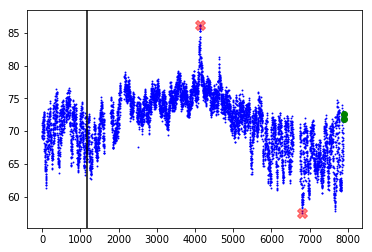




--- exchange-2_cpc_results ---
Corresponding window precision:  0.5
Corresponding window recall:  1.0
Corresponding window false positives:  1
Corresponding window false negatives:  0


Outlier indices as determined by best window threshold:  [247, 248, 1646, 1647]


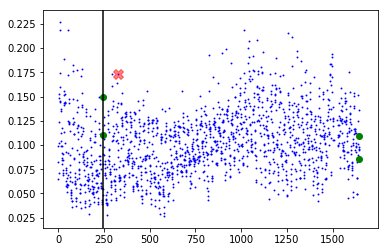




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [247, 248, 1646, 1647]


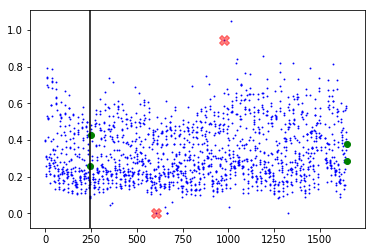




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  2
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [247, 248, 1645, 1646]


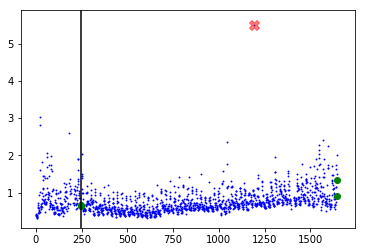




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.08333333333333333
Corresponding window recall:  0.2
Corresponding window false positives:  11
Corresponding window false negatives:  4


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 178

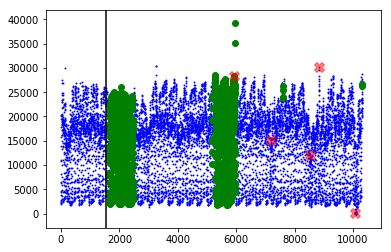

---------weight_fp=0.3, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  13.7
Best window threshold:  0.5312
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


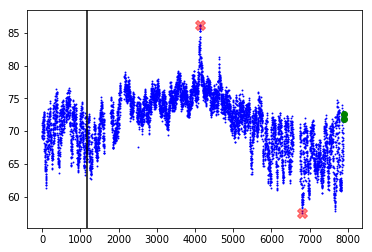




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


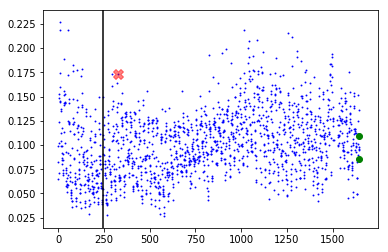




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


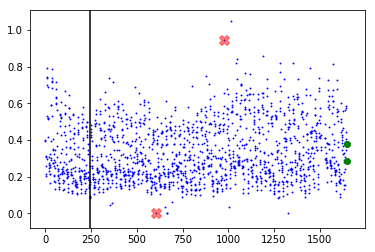




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


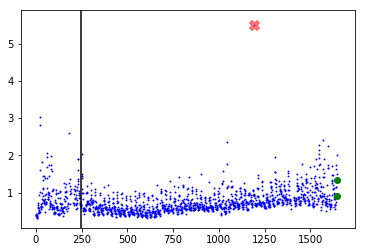




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


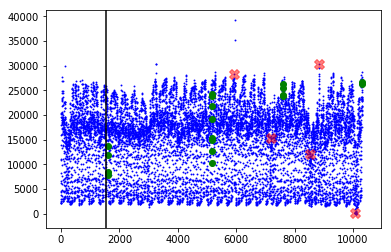

---------weight_fp=0.4, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  14.6
Best window threshold:  0.5312
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


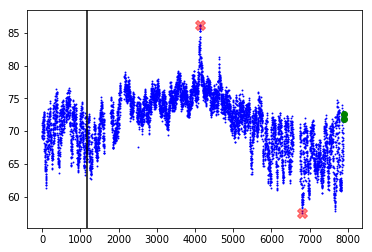




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


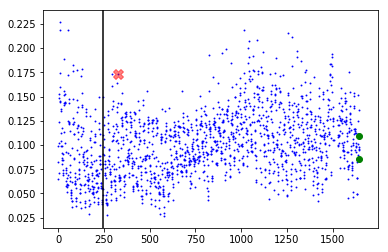




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


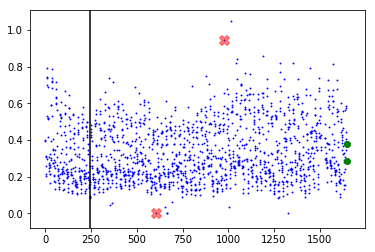




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


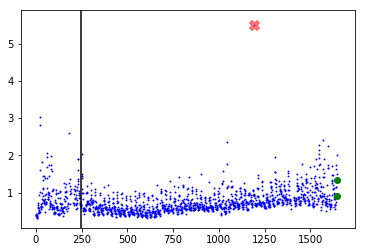




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


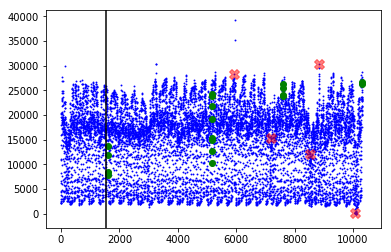

---------weight_fp=0.5, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  15.5
Best window threshold:  0.5312
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


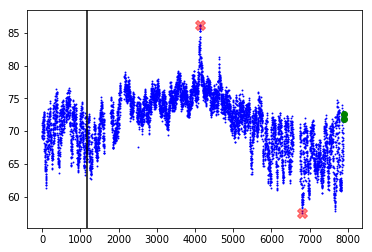




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


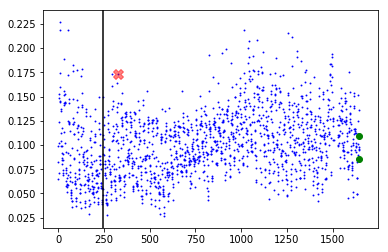




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


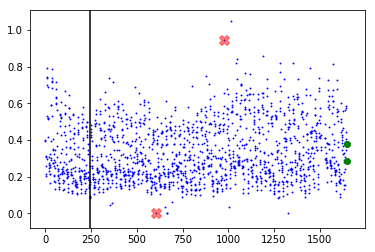




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


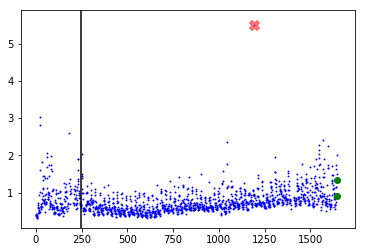




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


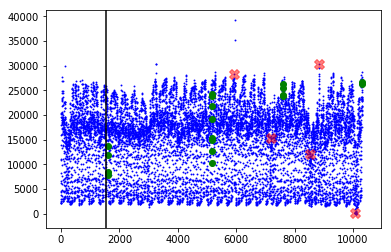

---------weight_fp=0.6, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  16.4
Best window threshold:  0.5312
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


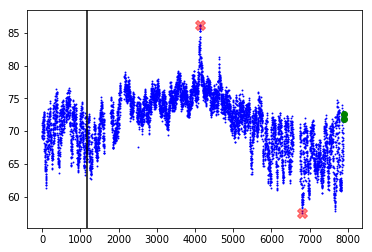




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


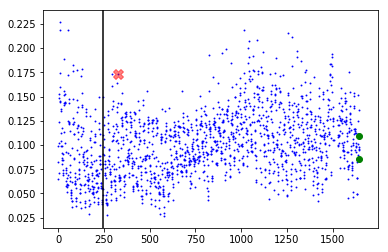




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


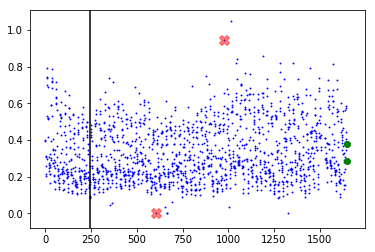




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


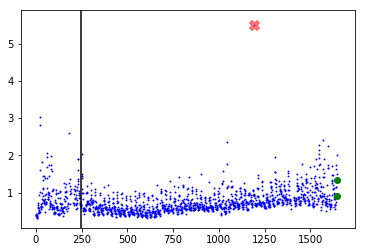




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


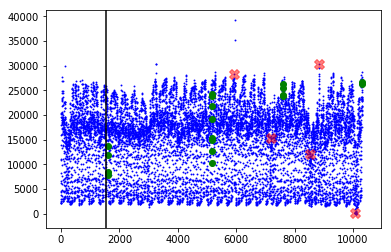

---------weight_fp=0.7, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  17.3
Best window threshold:  0.5312
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


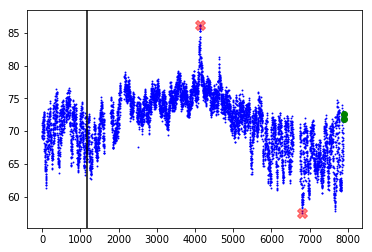




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


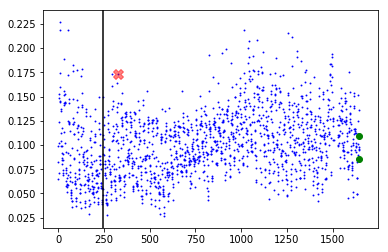




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


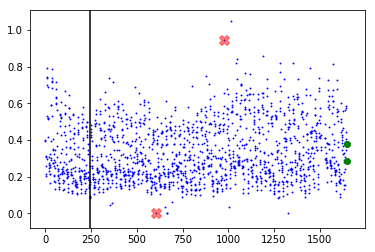




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


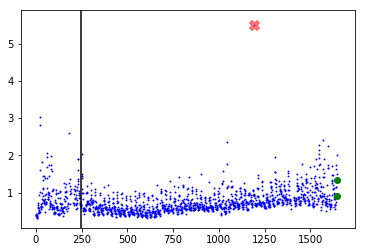




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


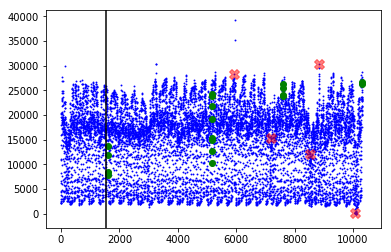

---------weight_fp=0.8, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  18.2
Best window threshold:  0.5312
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


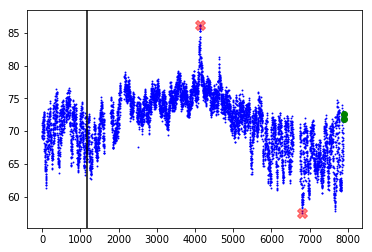




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


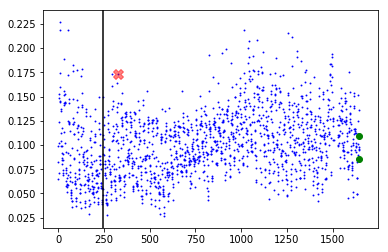




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


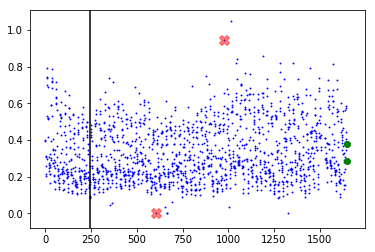




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


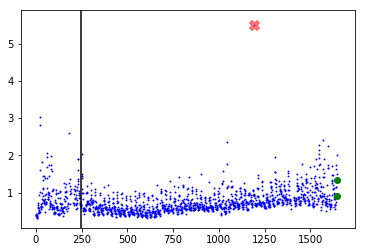




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


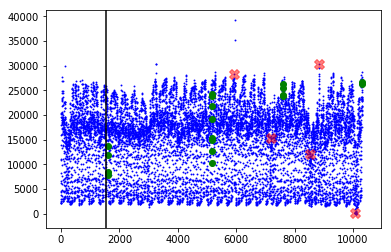

---------weight_fp=0.9, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  19.1
Best window threshold:  0.5312
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


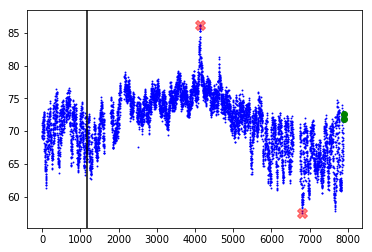




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


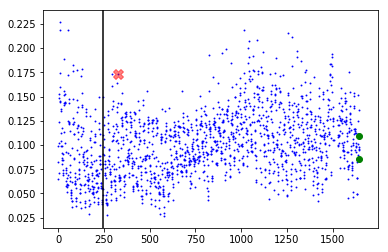




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


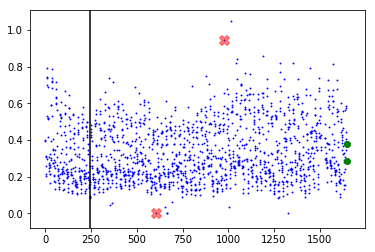




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


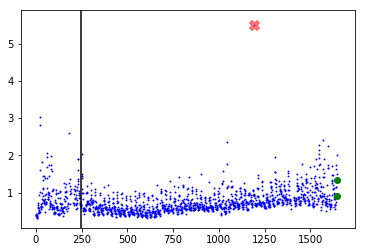




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


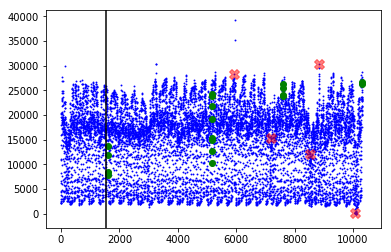

---------weight_fp=1.0, weight_fn=1----------


----Window-Based Results----
Minimum number of mistakes:  20.0
Best window threshold:  0.5312
Corresponding window overall precision:  0.0
Corresponding window overall recall:  0.0
Corresponding window overall F score:  nan



--- ambient_temperature_system_failure ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [7886, 7887]


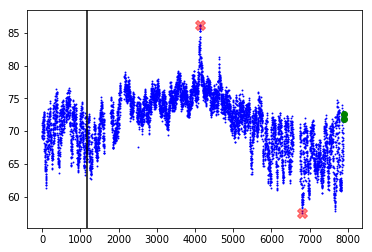




--- exchange-2_cpc_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1646, 1647]


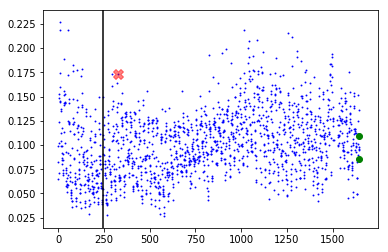




--- exchange-2_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  2


Outlier indices as determined by best window threshold:  [1646, 1647]


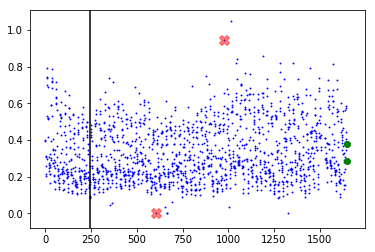




--- exchange-3_cpm_results ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  1
Corresponding window false negatives:  1


Outlier indices as determined by best window threshold:  [1645, 1646]


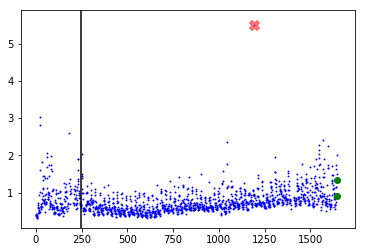




--- nyc_taxi_random_removal ---
Corresponding window precision:  0.0
Corresponding window recall:  0.0
Corresponding window false positives:  5
Corresponding window false negatives:  5


Outlier indices as determined by best window threshold:  [1601, 1602, 1603, 1604, 1605, 5168, 5169, 5170, 5171, 5172, 5183, 5184, 5185, 5186, 5187, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 10318, 10319]


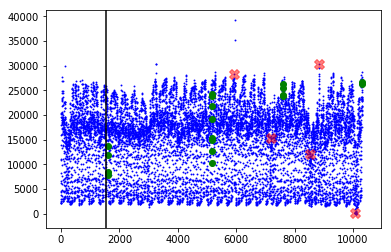

------------
False Positive Weight:  0.1
	 Minimum number of mistakes : 8.6
	 Best window threshold : 0.0
	 Corresponding window overall precision : 0.11224489795918367
	 Corresponding window overall recall : 1.0
	 Corresponding window overall F score : 0.20183486238532108
False Positive Weight:  0.2
	 Minimum number of mistakes : 12.400000000000002
	 Best window threshold : 0.518
	 Corresponding window overall precision : 0.10526315789473684
	 Corresponding window overall recall : 0.18181818181818182
	 Corresponding window overall F score : 0.13333333333333333
False Positive Weight:  0.3
	 Minimum number of mistakes : 13.7
	 Best window threshold : 0.5312
	 Corresponding window overall precision : 0.0
	 Corresponding window overall recall : 0.0
	 Corresponding window overall F score : nan
False Positive Weight:  0.4
	 Minimum number of mistakes : 14.6
	 Best window threshold : 0.5312
	 Corresponding window overall precision : 0.0
	 Corresponding window overall recall : 0.0
	 Correspon

In [32]:
end_results = {}
for weight_fp in weight_fp_list:  
    print("---------weight_fp=" + str(weight_fp) + ", weight_fn=1----------")
    weight_result = adclasses.pretty_print_results(stl_ad_dict, anomaly_scores_dict, stl_true_outlier_indices_dict, weight_fp=weight_fp, weight_fn=1)
    end_results[weight_fp] = weight_result

print("------------")
adclasses.pretty_print_end_results(end_results)

# NAB Score

    1. make a python 2.7 virtual environment
    2. pip install pandas
    3. git clone NAB
    4. pip install . in NAB

To obtain NAB scores for every method on the missing uniform datasets, we must do the following:

# Have a new dataset?

1. add the new dataset csv with timestamp, value in respective folder in data folder. no missing time steps allowed

2. add the point anomaly dates to combined_labels.json in labels folder

3. add the anomaly windows to combined_windows.json  (start and end dates)

4. in results/null, include null_datasetname.csv with timestamp, value, label, and anomaly_score (all .5). You can just use the adclasses.create_result_csv function and delete irrelevant columns and fill anomaly_score with all .5s

WARNING: We want datasets with missing time steps. Replace the dataset csv in the data folder with a nonfilled version

In [33]:
# nothing new

# For every anomaly detection method "method_name" and dataset "dataset_name", do the following:

0. clear up previous NAB/results/

1. $ python scripts/create_new_detector.py --detector method_name

this creates the method_name folder in results folder with a bunch of datasets folders that are empty. delete the irrelevant ones

2. for every characteristic relevant dataset, create csvs with columns like so: timestamp, value, anomaly_score, label. place in appropriate locations in results/method_name/

3. replace datasets with no fill

4. $ python run.py -d method_name --optimize --score --normalize

WARNING: HAVE TO MAKE CHANGE TO NAB function convertAnomalyScoresToDetections in util.py bc it will think values are strings

In [34]:
prepath="/home/cfreeman/Documents/NextIT/test_python_2/NAB/results_missinguniform" + window_size + "/"

# SARIMA

Final score for 'SARIMA' detector on 'auto_reward_low_FP_rate' profile = 34.80

Final score for 'SARIMA' detector on 'auto_reward_low_FN_rate' profile = 49.39

Final score for 'SARIMA' detector on 'auto_standard' profile = 35.27


In [35]:
folder="realKnownCause"
method_name = "SARIMA_auto"
dataset_name = "ambient_temperature_system_failure"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "SARIMA_auto"
dataset_name = "ec2_cpu_utilization_ac20cd"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-15 00:49:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "SARIMA_auto"
dataset_name = "exchange-2_cpc_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-14 13:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "SARIMA_auto"
dataset_name = "exchange-2_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "SARIMA_auto"
dataset_name = "exchange-3_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-08-19 18:15:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="selfCreate"
method_name = "SARIMA_auto"
dataset_name = "ibm-common-stock-closing-prices"
date_format = "%Y-%m-%d"
timestep = "1D"
true_outlier_dates = ["1965-06-08 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "SARIMA_auto"
dataset_name = "rds_cpu_utilization_cc0c53"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-02-25 07:15:00",
                      "2014-02-27 00:50:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "SARIMA_auto"
dataset_name = "artificial_cd_1_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realKnownCause"
method_name = "SARIMA_auto"
dataset_name = "nyc_taxi_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "30min"
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "SARIMA_auto"
dataset_name = "artificial_cd_3_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00",
                      "2014-04-03 18:40:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###

# Prophet

Final score for 'Prophet' detector on 'reward_low_FP_rate' profile = 31.19

Final score for 'Prophet' detector on 'reward_low_FN_rate' profile = 50.09

Final score for 'Prophet' detector on 'standard' profile = 34.93


In [36]:
folder="realKnownCause"
method_name = "Prophet"
dataset_name = "ambient_temperature_system_failure"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "Prophet"
dataset_name = "ec2_cpu_utilization_ac20cd"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-15 00:49:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "Prophet"
dataset_name = "exchange-2_cpc_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-14 13:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "Prophet"
dataset_name = "exchange-2_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "Prophet"
dataset_name = "exchange-3_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-08-19 18:15:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="selfCreate"
method_name = "Prophet"
dataset_name = "ibm-common-stock-closing-prices"
date_format = "%Y-%m-%d"
timestep = "1D"
true_outlier_dates = ["1965-06-08 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "Prophet"
dataset_name = "rds_cpu_utilization_cc0c53"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-02-25 07:15:00",
                      "2014-02-27 00:50:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "Prophet"
dataset_name = "artificial_cd_1_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realKnownCause"
method_name = "Prophet"
dataset_name = "nyc_taxi_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "30min"
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "Prophet"
dataset_name = "artificial_cd_3_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00",
                      "2014-04-03 18:40:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###

# GLM

Final score for 'GLM' detector on 'reward_low_FP_rate' profile = 35.99

Final score for 'GLM' detector on 'reward_low_FN_rate' profile = 57.50

Final score for 'GLM' detector on 'standard' profile = 41.02


In [37]:
folder="realKnownCause"
method_name = "GLM"
dataset_name = "ambient_temperature_system_failure"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "GLM"
dataset_name = "ec2_cpu_utilization_ac20cd"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-15 00:49:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "GLM"
dataset_name = "exchange-2_cpc_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-14 13:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "GLM"
dataset_name = "exchange-2_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "GLM"
dataset_name = "exchange-3_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-08-19 18:15:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="selfCreate"
method_name = "GLM"
dataset_name = "ibm-common-stock-closing-prices"
date_format = "%Y-%m-%d"
timestep = "1D"
true_outlier_dates = ["1965-06-08 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAWSCloudwatch"
method_name = "GLM"
dataset_name = "rds_cpu_utilization_cc0c53"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-02-25 07:15:00",
                      "2014-02-27 00:50:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "GLM"
dataset_name = "artificial_cd_1_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realKnownCause"
method_name = "GLM"
dataset_name = "nyc_taxi_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "30min"
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="artificialWithAnomaly"
method_name = "GLM"
dataset_name = "artificial_cd_3_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "5min"
true_outlier_dates = ["2014-04-01 16:40:00",
                      "2014-04-02 09:20:00",
                      "2014-04-03 02:00:00",
                      "2014-04-03 18:40:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###

# STL Resid

Final score for 'stl' detector on 'reward_low_FP_rate' profile = 28.21

Final score for 'stl' detector on 'reward_low_FN_rate' profile = 51.14

Final score for 'stl' detector on 'standard' profile = 33.81

In [38]:
folder="realKnownCause"
method_name = "stl"
dataset_name = "ambient_temperature_system_failure"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2013-12-22 20:00:00",
                      "2014-04-13 09:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "stl"
dataset_name = "exchange-2_cpc_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-14 13:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "stl"
dataset_name = "exchange-2_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-07-26 06:00:01",
                      "2011-08-10 17:00:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realAdExchange"
method_name = "stl"
dataset_name = "exchange-3_cpm_results"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "1H"
true_outlier_dates = ["2011-08-19 18:15:01"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###
folder="realKnownCause"
method_name = "stl"
dataset_name = "nyc_taxi_random_removal"
date_format = "%Y-%m-%d %H:%M:%S"
timestep = "30min"
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]

adclasses.create_result_csv(window_size,prepath, folder, method_name, dataset_name, date_format, timestep, true_outlier_dates, fill=False)
###